# Πληροφορίες Ομάδας
**Ομάδα 33**

- Βασιλείου Γεώργιος - ΑΜ 03116062
- Στεντούμης Σπυρίδω-Παρασκευάς  - ΑΜ 03116747
- Αλατζας Κωνσταντίνος - ΑΜ 03115028

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade nltk
!pip install --upgrade matplotlib
!pip install --upgrade pip
!pip install --upgrade pandas
!pip install --upgrade joblib
!pip install --upgrade somoclu
%matplotlib inline

     |████████████████████████████████| 22.2MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.4)
     |████████████████████████████████| 25.9MB 179kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 1.4MB 8.0MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=e79ff106a84ce85ed054c3715cf69fe3d91f7b9ff3f4e5e3348531b08715d217
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
  

     |████████████████████████████████| 1.5MB 7.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.1 MB 7.1 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=421040 sha256=848c9d97ae0ba743086d15b6f6286d1698805d1a632d1cbe582e66700d3db329
  Stored in directory: /root/.cache/pip/wheels/69/4c/18/b5f05a068134b3d70d4060a06d2cd9080fa21084dc876f51e3
Successfully built somoclu


In [ ]:
# CSS code to enable wraping output lines in google colab
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
import numpy as np
import nltk
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy as sp
import somoclu, matplotlib, time,itertools
from datetime import datetime

# Εισαγωγή του Dataset

Στην ενότητα αυτή λαμβάνουμε το Carnegie Mellon Movie Summary Corpus dataset, και το κατάλληλο τμήμα των δειγμάτων με βάση τον αριθμό της ομάδας. Στην συνέχεια επιβεβαιώνουμε πως τα δεδομένα που έχουν ληφθεί έχουν την αναμενόμενη μορφή (ως προς το πλήθος δειγμάτων και αριθμό στοιχείων σε κάθε datastructure) και ορίζουμε μια συνάρτηση μορφοποίησης των δεδομένων εξόδου που θα χρησημοποιηθεί στα 2 ερωτήματα.

In [ ]:
team_seed_number = 33

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)
movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

 Για να επιβεβαιώσουμε την μορφή του dataset, βρίσκουμε τον αριθμό των δειγμάτων που έχουν καταχωρηθεί και την μορφή των δεδομένων για κάποιο από αυτά.

In [ ]:
print("Title samples: "+str(np.size(titles)))
print("Category samples: "+str(np.size(categories)))
print("Bin samples: "+str(np.size(bins)))
print("Catbin samples: "+str(len(catbins))+"x"+str(len(catbins[0])))
print("Summary samples: "+str(np.size(summaries)))
print("Corpus samples: "+str(np.size(corpus)))

Title samples: 5000
Category samples: 5000
Bin samples: 22302
Catbin samples: 5000x322
Summary samples: 5000
Corpus samples: 5000


In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(np.size(categories[ID]))
print(catbins[ID])
print(corpus[ID])

['The Barber of Siberia']
['"Romance Film",  "Drama",  "Comedy"']
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Ορίζουμε συνάρτηση ```get_movie``` για την μορφοποίηση των ταινιών και των αποτελεσμάτων.

In [ ]:
def get_movie(movie_id,suppress_description=False):
  if (suppress_description):
    return (f"Title: {titles[movie_id][0]} \nGenres: {categories[movie_id]}" )
  else:
    return (f"Title: {titles[movie_id][0]} \nSummary: {summaries[movie_id][0]} \nGenres: {categories[movie_id]}" )

print(get_movie(ID))

# Εφαρμογή 1 - Σύστημα συστάσεων ταινιών βασισμένο στο περιεχόμενο

Δημιουργούμε ένα TFIDF διάνυσμα της βάσης ταινιών, με χρήση vectorizer χωρίς επιλογή υπερπαραμέτρων.

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)
print(f"Non optimized TF-IDF shape: {corpus_tf_idf.shape}")
# print(f"TF-IDF vectorizer feature names: \n {vectorizer.get_feature_names()}")

Non optimized TF-IDF shape: (5000, 48891)


Βλέπουμε ότι η παραπάνω TFIDF ανάλυση των corpus περιγραφών αποτελείται από σχεδόν 49000 διαφορετικά στοιχεία. Γνωρίζουμε ότι η διαστατικότητα της ανάλυσης θα επηρρεάσει πολύ την ακρίβεια των προτάσεων της εφαρμογής και του χρόνου εκπαίδευσης των αυτοοργανόμενων χαρτών (Εφαρμογή 2). Για την βελτιστοποίηση παραμετρικοποίησης του vectorizer θα ακολουθήσουμε μια επαναληπτική διαδικασία μεταβολής υπερπαραμέτρων και αξιολόγησης των προτάσεων με την συνάρτηση content_recommender.

In [ ]:
def content_recommender(corpus_tfidf, target_movie, max_recommendations,suppress_descriptions = False):
  """ Recommend max_recommendations number of movies from corpus_tfidf. 
  Recommendations are based on cosine distance from target movie.
  Return tuple (ret_str, rec).
  ret_str -- return string, to be printed
  rec -- list of movie ids recommended. To be used with get_movie_features

  optional arguments:
  suppress_descriptions = False -- ret_str should not contain the movie desctiptions
  """
  target_movie_corpus = corpus_tfidf[target_movie]
  
  # calculate cosine distance between target_movie and all other movie corpora
  # because cosine distance is used, distance array has to be sorted in ASCENDING order.
  distances = np.zeros(corpus_tfidf.shape[0])
  for i in range(0,corpus_tfidf.shape[0]):
    distances[i] = sp.spatial.distance.cosine(target_movie_corpus.toarray(), corpus_tfidf[i].toarray())

  # get array of indexes of sorted distances array. First recommendation is always target_movie.
  sorted_ids = np.argsort(np.array(distances))

  # create return string with recomendations
  ret_str = f"*** Target Movie: {target_movie} ***\n"+get_movie(target_movie,suppress_descriptions) 
  ret_str+= f"\n*** {max_recommendations} best recommendations based on description ***"
  for i in range(1, max_recommendations+1):
    id = sorted_ids[i]
    ret_str += f"\n*** Recommendation No. {i} *** \nMovie ID: {id} \n"+get_movie(id,suppress_descriptions)

  return (ret_str, sorted_ids[0:max_recommendations+1])

ret_str, rec = content_recommender(corpus_tf_idf, target_movie=99, max_recommendations=2)
print(ret_str)

*** Target Movie: 99 ***
Title: The Barber of Siberia 
Summary: Jane Callahan , a beautiful American lady, writes to her son, a cadet at a famous military academy, about a long kept secret.Twenty years ago she arrived in Russia to assist Douglas McCracken , an obsessive engineer who needs the Grand Duke's patronage to sponsor his invention, a massive machine to harvest the forests. On her travels, she meets two men who would change her life forever: a handsome young Andrei Tolstoy  with whom she shares a fondness for opera, and the powerful General Radlov who is entranced by her beauty and wants to marry her. Tolstoy and Radlov, much to the surprise and indignation of the latter, become rivals for Jane's love. She confides a deep secret to Tolstoy, promises to marry him, and together they spend a passionate night of love. But later he overhears Jane denying her interest in him to the General. Distraught, Tolstoy attacks the General who arrests his young rival on false charges and banis

Εντυπωσικακό στις παραπάνω προτάσεις είναι ότι οι 2 ταινίες που πρότεινε ο vectorizer έχουν πρωταγωνιστικό χαρακτήρα με όνομα Jane. Φυσικά, αυτό δεν θα έπρεπε να αποτελεί feature για τον ταξινομητή. 

Ψάχνουμε να δούμε πόσες φορές εμφανίζονται ονόματα όπως Jane ή Edward στις περιγραφές.

In [ ]:
def report_frequency(vectorizer, corpus_tf_idf, word):
  """
  Find the frequency of word in corpus for given vectorization.
  Return a string.
  """
  feature_index = vectorizer.vocabulary_.get(word)
  corpus = vectorizer.inverse_transform(corpus_tf_idf)

  sum = 0
  for entry in corpus:
    sum = (sum + 1) if word in entry else sum
  ret_str = f"*** Frequency report for: {word}***\nWord is feature no. {feature_index}.\nFeature was found in {sum} entries."

  return ret_str

print(report_frequency(vectorizer, corpus_tf_idf, 'jane'))
print(report_frequency(vectorizer, corpus_tf_idf, 'edward'))
print(report_frequency(vectorizer, corpus_tf_idf, 'henry'))

*** Frequency report for: jane***
Word is feature no. 22473.
Feature was found in 53 entries.
*** Frequency report for: edward***
Word is feature no. 13721.
Feature was found in 35 entries.
*** Frequency report for: henry***
Word is feature no. 19618.
Feature was found in 79 entries.


## Βελτιστοποίηση υπερπαραμέτρων του Vectorizer

Στην σύνέχεια, προσπαθούμε να βελτιώσουμε την απόδοση του vectorizer με την χρήση κατάλληλων υπερπαραμέτρων. Ξεκινάμε με τον ορισμό των παραμέτρων ```max_df ```, ```min_df``` και ```stop_words```:

- ```min_df = N``` : Τα χαρακτηριστικά που κατασκευάζει ο ταξινομητής πρέπει να εμφανίζονται τουλαχιστον N φορές στο σύνολο των περιγραφών. Με αυτόν τον τρόπο στοχεύουμε να μειώσουμε τα χαρακτηριστικά που δημιουργούνται από ονόματα, αφού η εμφάνιση ονομάτων δεν συνεισφέρει στην συνάφεια των δειγμάτων.
_Σημειώνουμε ότι_ η μετρική αυτή αφορά το document frequency των λέξεων και όχι τις φορές που εμφανίζεται η κάθε λέξη ανά περιγραφή. Χαρακτηριστικά το όνομα Jane εμφανίζεται πολλές φορές σε κάθε περιγραφή ταινιών που πρότεινε ο μη-βελτιστοποιημένος vectorizer.

- ```max_df = 0.8``` : Μέγιστο ποσοστό εμφάνισης λέξης ανά περιγραφή ώστε να προσμετρηθεί ως χαρακτηριστικό. Αν η λέξη εμφανίζεται σε πάνω από το 80% των περιγραφών ταινίας, η πληροφορία που προσθέτει μπορεί να θεωρηθεί αμελητέα. Σκοπός της παραμέτρου είναι να μειώσει την δημιοργία χαρακτηρηστικών από λέξεις που εμφανίζονται συχνά στην περιγραφή πλοκής όπως 'plot', 'movie'  κοκ.

- ```stop_words = "english" ``` : Η παράβλεψη των συχνότερων λέξεων στα αγγλικά που δεν προσδίδουν νοηματικά στην περιγραφή. Τέτοιες είναι πχ οι λέξεις 'α', 'the', 'he', 'she' κοκ. Παρόλο που πολλές από αυτές τις λέξεις θα είχαν απομακρυνθεί ήδη αυτόματα από την συνθήκη μέγιστης εμφάνισης (```max\_df```) προσθέτουμε και την λίστα, με σκοπό να μειώσουμε περαιτέρω των αριθμό features.

In [ ]:
vectorizer2 = TfidfVectorizer(stop_words='english',min_df=100,max_df=0.8)
vectorizer2.fit(corpus)
corpus_tf_idf2 = vectorizer2.transform(corpus)
print(f"Non optimized TF-IDF shape: {corpus_tf_idf2.shape}")
# print(f"TF-IDF vectorizer feature names: \n {vectorizer.get_feature_names()}")
print(report_frequency(vectorizer2, corpus_tf_idf2, 'jane'))
print(report_frequency(vectorizer2, corpus_tf_idf2, 'edward'))
print(report_frequency(vectorizer2, corpus_tf_idf2, 'henry'))

Non optimized TF-IDF shape: (5000, 1049)
*** Frequency report for: jane***
Word is feature no. None.
Feature was found in 0 entries.
*** Frequency report for: edward***
Word is feature no. None.
Feature was found in 0 entries.
*** Frequency report for: henry***
Word is feature no. None.
Feature was found in 0 entries.


Αμέσως βλέπουμε ότι 1) ο αριθμός των χαρακτηριστικών που δημιουργούνται είναι δραματικά μικρότερος από τον προηγούμενο vectorizer και 2) πλέον τα ονόματα ```jane, edward``` και ```henry``` που είχαμε δεί δεν αποτελούν χαρακτηριστικά.

In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf2, target_movie=99, max_recommendations=3)
print(ret_str)

*** Target Movie: 99 ***
Title: The Barber of Siberia 
Summary: Jane Callahan , a beautiful American lady, writes to her son, a cadet at a famous military academy, about a long kept secret.Twenty years ago she arrived in Russia to assist Douglas McCracken , an obsessive engineer who needs the Grand Duke's patronage to sponsor his invention, a massive machine to harvest the forests. On her travels, she meets two men who would change her life forever: a handsome young Andrei Tolstoy  with whom she shares a fondness for opera, and the powerful General Radlov who is entranced by her beauty and wants to marry her. Tolstoy and Radlov, much to the surprise and indignation of the latter, become rivals for Jane's love. She confides a deep secret to Tolstoy, promises to marry him, and together they spend a passionate night of love. But later he overhears Jane denying her interest in him to the General. Distraught, Tolstoy attacks the General who arrests his young rival on false charges and banis

Εξετάζουμε ποια είναι τα features της target_movie και ποια τα features των υπόλοιπων ταινιών που προτάθηκαν από το corpus.

In [ ]:
def get_movie_features(vectorizer, corpus_tf_idf,movie_ids, show_common_features = False):
  """
  Get movie features for some vectorizer, copus for a list of movie_ids.
  movie_ids list should usually be rec list returned from content_recommender
  Returns report string.

  Optional arguments:
  show_common_features (= False) -- whether ret_str should include a list of tuples
                                    with features that the movies have in common
  """
  ret_str = ""
  common_features = dict()
  for id in movie_ids:
    # get and sort features of each id
    features = vectorizer.inverse_transform(corpus_tf_idf)[id]
    features = sorted(features.tolist())
    # then, add them in a dictionary of features for the ids given. if a feature appers in at least 2 movies,
    # then print it as a common feature
    for feature in features:
      try:
        common_features[feature] += 1
      except KeyError:
        if id == movie_ids[0]:
          common_features[feature] = 1

    # finally return a report for features found
    ret_str += f"*** Movie Title: {titles[id][0]} ***\nMovie ID: {id}\nFeatures extracted from corpus ({len(features)}):\n{features}\n"
  if show_common_features:
    ret_str += f"*** Common Features ***\n{[(key, common_features[key]) for key in common_features.keys() if common_features[key]>1]}"
  return ret_str

print(get_movie_features(vectorizer2, corpus_tf_idf2, rec, show_common_features=True))

*** Movie Title: The Barber of Siberia ***
Movie ID: 99
Features extracted from corpus (33):
['ago', 'american', 'attacks', 'beautiful', 'change', 'deep', 'famous', 'general', 'hard', 'kept', 'lady', 'later', 'life', 'long', 'love', 'machine', 'marry', 'meets', 'men', 'military', 'needs', 'night', 'powerful', 'promises', 'rival', 'secret', 'son', 'spend', 'surprise', 'travels', 'wants', 'years', 'young']
*** Movie Title: Ruthless Tactics ***
Movie ID: 460
Features extracted from corpus (69):
['assigned', 'attacked', 'attempt', 'attempts', 'away', 'band', 'battle', 'catch', 'cause', 'confronts', 'contact', 'death', 'dinner', 'discover', 'discovered', 'discovers', 'don', 'earth', 'father', 'female', 'fight', 'finally', 'force', 'forced', 'general', 'goes', 'government', 'hide', 'identity', 'including', 'informs', 'japanese', 'know', 'lead', 'leader', 'life', 'lives', 'make', 'master', 'meets', 'missing', 'mission', 'named', 'nearby', 'old', 'order', 'past', 'plan', 'possible', 'quickly',

Βλέπουμε ότι τα features που εξάγονται πλέον από τις περιγραφές έχουν μειωθεί δραματικά. Συγκεκριμένα, έχουν μειωθεί στα 1000 περίπου, και όπως δείξαμε και πριν δεν περιλαμβάνουν ονόματα και συνδετικές ή συχνές λέξεις της αγγλικής. Μπορούμε λοιπόν να αξιολογήσουμε τις παραπάνω προτάσεις σαν πιο ορθές.

Παρ' όλα αυτά, βλέπουμε στα παραπάνω χαρακτηριστικά τα εξής προβλήματα.
1. Έχουν δημιουργηθεί χαρακτηριστικά που είναι νοηματικά ίδια μεταξύ τους, λόγω των γραμματικών μορφών της γλώσσας. Πχ. attempt και attemmpts, lead και leader, watch και watches κοκ.
2. Σε κάποιες ταινίες (id: 4758) έχουν παραμείνει ακόμα πολλά χαρακτηριστικά γεγονός που μειώνει κατά συνέπεια το βάρος των κοινών χαρακτηριστικών του corpus.

Επίσης μπορούμε να δούμε παρακάτω ότι έχουν παραμείνει και χαρακτηριστικά που δεν είναι νοηματικά χρήσιμα όπως κοινά ονόματα (john) και κοινές λέξεις όπως plot και movie.



In [ ]:
print(report_frequency(vectorizer2, corpus_tf_idf2, 'john'))
print(report_frequency(vectorizer2, corpus_tf_idf2, 'movie'))
print(report_frequency(vectorizer2, corpus_tf_idf2, 'plot'))

*** Frequency report for: john***
Word is feature no. 481.
Feature was found in 255 entries.
*** Frequency report for: movie***
Word is feature no. 603.
Feature was found in 565 entries.
*** Frequency report for: plot***
Word is feature no. 680.
Feature was found in 281 entries.


Η  αφαίρεση αυτών των χαρακτηριστικών μπορεί να αποφευχθεί με την χρήση μιας καλύτερης προεπεξεργασίας των κειμένων, και συγκεκριμένα την ενσωμάτωση stemmer. Επιπλέον, αυξάνουμε τον ελάχιστο αριθμό εμφανίσεων του χαρακτηριστικού στο σύνολο των περιγραφών.
### Χρήση Stemmer και Lemmatizer

In [ ]:
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stemmer = PorterStemmer()

master_stop_words_list = list(ENGLISH_STOP_WORDS) + list(string.punctuation)

def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

def tokenize(doc):
  words = nltk.word_tokenize(doc.lower())
  filtered_words = [word for word in words if word not in master_stop_words_list]
  filtered_words_2 = thorough_filter(filtered_words)
  stems = [stemmer.stem(item) for item in filtered_words_2 if len(stemmer.stem(item))>2]
  # stems = [lemmatizer.lemmatize(item) for item in filtered_words_2]

  return stems

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vectorizer3 = TfidfVectorizer(tokenizer = tokenize,min_df=150,max_df=0.8)
start = datetime.now()
vectorizer3.fit(corpus)
corpus_tf_idf3 = vectorizer3.transform(corpus)
end = datetime.now()
print(f"Finished training TFIDF Vectorizer: {end-start}")
print(f"Optimized TF-IDF shape: {corpus_tf_idf3.shape}")

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Finished training TFIDF Vectorizer: 0:01:40.966695
Optimized TF-IDF shape: (5000, 703)


Αναφέρουμε ότι δεν αυξάνουμε πολύ την παράμετρο min_df επειδή κινδυνεύουμε να απορρίψουμε χρήσιμα χαρακτηριστικά. Έαν δεν αρκεί αυτή η αύξηση, μπορούμε στην συνέχεια να απορρίψουμε μεμονομένα χαρακτηριστικά μέσω stopwords.

Εξετάζουμε τις προτάσεις που δημιουργούνται και τα features που οδήγησαν σε αυτές. Αξιοσημείωτο είναι ότι οι προτάσεις δεν έχουν αλλάξει πολύ από την προηγούμενη υλοποίηση του vectorizer.

In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf3, target_movie=99, max_recommendations=3)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 99 ***
Title: The Barber of Siberia 
Summary: Jane Callahan , a beautiful American lady, writes to her son, a cadet at a famous military academy, about a long kept secret.Twenty years ago she arrived in Russia to assist Douglas McCracken , an obsessive engineer who needs the Grand Duke's patronage to sponsor his invention, a massive machine to harvest the forests. On her travels, she meets two men who would change her life forever: a handsome young Andrei Tolstoy  with whom she shares a fondness for opera, and the powerful General Radlov who is entranced by her beauty and wants to marry her. Tolstoy and Radlov, much to the surprise and indignation of the latter, become rivals for Jane's love. She confides a deep secret to Tolstoy, promises to marry him, and together they spend a passionate night of love. But later he overhears Jane denying her interest in him to the General. Distraught, Tolstoy attacks the General who arrests his young rival on false charges and banis

In [ ]:
print(get_movie_features(vectorizer3, corpus_tf_idf3, rec, show_common_features=False))

*** Movie Title: The Barber of Siberia ***
Movie ID: 99
Features extracted from corpus (36):
['ago', 'american', 'arrest', 'arriv', 'assist', 'attack', 'beauti', 'chang', 'charg', 'famou', 'gener', 'hard', 'ladi', 'later', 'life', 'long', 'love', 'marri', 'meet', 'men', 'militari', 'need', 'night', 'power', 'promis', 'rival', 'secret', 'share', 'son', 'spend', 'surpris', 'travel', 'want', 'write', 'year', 'young']
*** Movie Title: Ruthless Tactics ***
Movie ID: 460
Features extracted from corpus (74):
['assign', 'assist', 'attack', 'attempt', 'away', 'battl', 'catch', 'caus', 'confront', 'contact', 'death', 'deliv', 'determin', 'dinner', 'discov', 'earth', 'face', 'father', 'femal', 'fight', 'final', 'forc', 'gener', 'goe', 'govern', 'guard', 'hero', 'hide', 'hire', 'ident', 'includ', 'inform', 'kidnap', 'killer', 'know', 'lead', 'leader', 'life', 'live', 'make', 'meet', 'miss', 'mission', 'name', 'nearbi', 'old', 'order', 'past', 'plan', 'play', 'possibl', 'prison', 'quickli', 'race',

Από το παραπάνω βλέπουμε ότι έχουν αφαιρεθεί πλήρως τα "διπλά" features. 
Επίσης εξετάζουμε αν παρέμειναν οι κοινές λέξεις και τα ονόματα που προαναφέραμε.




### Προσθήκη επιπλέον stopwords

Στην συνέχεια θα προσθέσουμε επιπλέον stopwords που βρίσκουμε στο corpus και θεωρούμε πως δεν είναι χρήσιμες. Για να βρούμε τα χαρακτηριστικά αυτά, θα δούμε τις προτάσεις του vectorizer3 χωρίς να δίνουμε αναλυτικά τις περιγραφές των ταινιών.

In [ ]:
print(report_frequency(vectorizer3, corpus_tf_idf3, stemmer.stem('john')))
print(report_frequency(vectorizer3, corpus_tf_idf3, stemmer.stem('george')))
print(report_frequency(vectorizer3, corpus_tf_idf3, stemmer.stem('movie')))
print(report_frequency(vectorizer3, corpus_tf_idf3, stemmer.stem('plot')))
print(report_frequency(vectorizer3, corpus_tf_idf3, stemmer.stem('film')))

*** Frequency report for: john***
Word is feature no. 331.
Feature was found in 256 entries.
*** Frequency report for: georg***
Word is feature no. 261.
Feature was found in 150 entries.
*** Frequency report for: movi***
Word is feature no. 406.
Feature was found in 575 entries.
*** Frequency report for: plot***
Word is feature no. 459.
Feature was found in 321 entries.
*** Frequency report for: film***
Word is feature no. 241.
Feature was found in 1532 entries.


In [ ]:
print(report_frequency(vectorizer3, corpus_tf_idf3, stemmer.stem('part')))
print(report_frequency(vectorizer3, corpus_tf_idf3, stemmer.stem('protagonist')))
print(report_frequency(vectorizer3, corpus_tf_idf3, stemmer.stem('character')))
print(report_frequency(vectorizer3, corpus_tf_idf3, stemmer.stem('acting'))) 
# act feature might be from acting, but may also be from act, acted etc 

*** Frequency report for: part***
Word is feature no. None.
Feature was found in 0 entries.
*** Frequency report for: protagonist***
Word is feature no. None.
Feature was found in 0 entries.
*** Frequency report for: charact***
Word is feature no. 106.
Feature was found in 319 entries.
*** Frequency report for: act***
Word is feature no. 7.
Feature was found in 398 entries.


In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf3, target_movie=60, max_recommendations=3)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 60 ***
Title: Far Cry 
Summary: Jack Carver, a former member of Germany's Special Forces, takes journalist Valerie Cardinal to visit her Uncle Max on an island, where he works in a military complex. As they arrive, monsters created by Doctor Krieger capture Valerie. Jack does not care about her until his boat explodes. After his boat is destroyed, Jack finds out the true purpose of the facilities on the island: the creation of genetically modified soldiers. 
Genres: ['"Thriller",  "Science Fiction",  "Horror",  "World cinema",  "Action/Adventure",  "Action"']
*** 3 best recommendations based on description ***
*** Recommendation No. 1 *** 
Movie ID: 1717 
Title: Mediterraneo 
Summary: In 1941, one year after Italy joined Germany against the Allies in World War II, a small group of misfit Italian soldiers is sent to a small Greek island in the Aegean Sea for four months of lookout duty. The soldiers include a lieutenant who likes art, a macho sergeant, a farmer accompa

In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf3, target_movie=3000, max_recommendations=3)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 3000 ***
Title: Multiple Sarcasms 
Summary: Gabriel  is a man who, on the surface, has it all - successful professional life as an architect, a beautiful wife, and a devoted young daughter. But slowly it dawns on him that he is not really happy. Gabriel decides that he wants to write a play about the sorry state of his life. After being fired from his job, he gets a pushy literary agent friend to represent him and starts writing. The changes that occur in his life after this leads him to further question what makes him happy. Indeed, the sun will come out, tomorrow.Multiple Sarcasms  - Plot summary 
Genres: ['"Indie",  "Family Drama",  "Comedy-drama",  "Period piece",  "Drama",  "Romantic drama",  "Romance Film"']
*** 3 best recommendations based on description ***
*** Recommendation No. 1 *** 
Movie ID: 1654 
Title: Man About Town 
Summary: Top Hollywood talent agent, Jack Giamoro , seems to have it all: a successful career, a lot of money, a nice car, a beautiful wi

Προσθέτουμε τις εξής λέξεις στο stopword list.



In [ ]:
import urllib
custom_list = ['big','film', 'movie', 'plot', 'did','lot',
               'character','characters','acting','actor','actress','summary',
               'probably']
f = urllib.request.urlopen('https://raw.githubusercontent.com/sudhir-voleti/basic-text-analysis-shinyapp/master/data/stopwords.txt')
more_stopwords = f.read().decode('utf-8').split()

t = (list(ENGLISH_STOP_WORDS) + list(string.punctuation)+custom_list)
print([word for word in more_stopwords if word not in t])

["a's", 'able', 'according', 'accordingly', 'actually', "ain't", 'allow', 'allows', 'anybody', 'anyways', 'apart', 'appear', 'appreciate', 'appropriate', "aren't", 'aside', 'ask', 'asking', 'associated', 'available', 'away', 'awfully', 'b', 'believe', 'best', 'better', 'brief', 'c', "c'mon", "c's", 'came', "can't", 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', "couldn't", 'course', 'currently', 'd', 'definitely', 'described', 'despite', "didn't", 'different', 'does', "doesn't", 'doing', "don't", 'downwards', 'e', 'edu', 'entirely', 'especially', 'et', 'everybody', 'ex', 'exactly', 'example', 'f', 'far', 'fifth', 'followed', 'following', 'follows', 'forth', 'furthermore', 'g', 'gets', 'getting', 'given', 'gives', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', "hadn't", 'happens', 'hardly', "hasn't", "haven't", 'having', "h

In [ ]:
# most common english names
common_names = ['george', 'john','jack','oliver','harry','noah','jacob','leo','oscar',
                'charlie','charles','olivia','amelia','isla','ava','emily',
                'isabella','mia','ella','lily','robert','michael','william',
                'david','richard','joseph','thomas','paul','mark','mary','linda',
                'barbara','susan','margaret','dorothy']
master_stop_words_list = (list(ENGLISH_STOP_WORDS) + list(string.punctuation) 
                          +more_stopwords + custom_list + common_names)

vectorizer4 = TfidfVectorizer(tokenizer = tokenize,min_df=100,max_df=0.7)
start = datetime.now()
vectorizer4.fit(corpus)
corpus_tf_idf4 = vectorizer4.transform(corpus)
end = datetime.now()
print(f"Finished training TFIDF Vectorizer: {end-start}")
print(f"Optimized TF-IDF shape: {corpus_tf_idf4.shape}")

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Finished training TFIDF Vectorizer: 0:01:51.845326
Optimized TF-IDF shape: (5000, 972)


Bλέπουμε οτι με την χρήση πιο εκτεταμμένων stopwords μειώνουμε τα χαρακτηριστικά του copus λίγο ακόμα. Σημειώνεται ότι η παραπάνω προσέγγιση αφαιρεί τελείως τα ονόματα `george` και `john` αλλά όχι το χαρακτηριστικό `act` επειδή προέρχεται και από άλλες λέξεις.


In [ ]:
print(report_frequency(vectorizer4, corpus_tf_idf4, stemmer.stem('characters')))
print(report_frequency(vectorizer4, corpus_tf_idf4, stemmer.stem('john')))
print(report_frequency(vectorizer4, corpus_tf_idf4, stemmer.stem('george')))
print(report_frequency(vectorizer4, corpus_tf_idf4, stemmer.stem('acting')))

*** Frequency report for: charact***
Word is feature no. None.
Feature was found in 0 entries.
*** Frequency report for: john***
Word is feature no. None.
Feature was found in 0 entries.
*** Frequency report for: georg***
Word is feature no. None.
Feature was found in 0 entries.
*** Frequency report for: act***
Word is feature no. 10.
Feature was found in 318 entries.


In [ ]:
# save best vectorizer and corpus
joblib.dump(vectorizer4,'vectorizer.pkl')
joblib.dump(corpus_tf_idf4,'corpus_tf_idf.pkl')
!ls -lh

total 17M
-rw-r--r-- 1 root root 3.2M Dec 23 18:11 corpus_tf_idf.pkl
drwxr-xr-x 1 root root 4.0K Dec 21 17:29 sample_data
-rw-r--r-- 1 root root  13M Dec 23 17:11 som.pkl
-rw-r--r-- 1 root root 695K Dec 23 18:11 vectorizer.pkl


In [ ]:
# load best vectorizer and corpus
vectorizer4 = joblib.load('vectorizer.pkl')
corpus_tf_idf4 = joblib.load('corpus_tf_idf.pkl')

## Δοκιμή του Vectorizer - Παραδείγματα

Στην συνέχεια δίνουμε παραδείγματα τις παραγωγής σωστών προτάσεων. Θα δώσουμε τις 5 κορυφαίες προτάσεις του συστήματος για 10 τυχαίες ταινίες του dataset. Για κάθε πρόταση θα δώσουμε τον κοινό νοηματικό άξονα των ταινιών.


### Παράδειγμα 1: One of our Dinosaurs is Missing

In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=6, max_recommendations=5)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 6 ***
Title: One of Our Dinosaurs is Missing 
Summary: Escaping from China with a microfilm of the formula for the mysterious "Lotus X", Lord Southmere, a Queen's Messenger, is chased by a group of Chinese spies. Back in London, Lord Southmere manages to escape from a chauffeur who is trying to kidnap him, and then runs into the Natural History Museum. Chinese spies follow him, so he hides the microfilm in the bones of one of the large dinosaur skeletons. He is relieved to meet his former nanny, Hettie, in the museum, and asks her to retrieve the microfilm. Southmere then faints and is captured by the Chinese, who tell Hettie and Emily  that they are taking him to a doctor. Hettie and Emily enlist other nannies to help them search. They hide in the mouth of the blue whale display until after closing time and then begin looking over the skeleton of an Apatosaurus . They are unsuccessful, and most have to return home to care for their children, but Hettie, Emily and the

In [ ]:
print(get_movie_features(vectorizer4,corpus_tf_idf4,rec,show_common_features=True))

*** Movie Title: One of Our Dinosaurs is Missing ***
Movie ID: 6
Features extracted from corpus (68):
['allow', 'ask', 'base', 'battl', 'begin', 'boy', 'bring', 'brother', 'captur', 'care', 'carri', 'charg', 'chase', 'chief', 'children', 'close', 'continu', 'danger', 'decid', 'doctor', 'drive', 'end', 'escap', 'fail', 'fight', 'final', 'follow', 'fortun', 'friend', 'good', 'group', 'hide', 'histori', 'home', 'kidnap', 'larg', 'lock', 'london', 'manag', 'meet', 'mysteri', 'natur', 'news', 'night', 'queen', 'realis', 'remain', 'rescu', 'restaur', 'retriev', 'return', 'reveal', 'run', 'safeti', 'search', 'secret', 'spi', 'steal', 'street', 'take', 'team', 'time', 'train', 'trick', 'unsuccess', 'watch', 'young', 'younger']
*** Movie Title: Turtles Are Surprisingly Fast Swimmers ***
Movie ID: 1788
Features extracted from corpus (105):
['accident', 'apart', 'appear', 'arrest', 'artist', 'belong', 'bodi', 'busi', 'buy', 'caus', 'chanc', 'childhood', 'complet', 'concern', 'contact', 'corps', '

Κοινό θέμα στις παραπάνω ταινίες είναι οι κατάσκοποι, αρπαγές, κλοπές και τα μυστήρια. Βλέπουμε πως κοινά features που έχουν δημιουργηθεί είναι`spy,spies` ,`chase`,`kidnap`, `escape`,`steal` και `hide, hidden`. Η πιο κοντινή πρόταση έχει επιπρόσθετα κοινά θέματα `mystery`, `home, house` και επιπλέον οι 3 πρώτες προτάσεις όχι μόνο ακολουθούν το κοινό θέμα αλλά είναι και 3 κωμωδίες όπως και η ταινία-στόχος. Οι τελευταίες ταινίες που προτείνονται παραμένουν κατασκοπικές, αλλά (πιθανώς και λόγω των σύντομων περιγραφών τους) είναι πιο σοβαρές.

### Παράδειγμα 2: A Far Cry


In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=60, max_recommendations=5)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 60 ***
Title: Far Cry 
Summary: Jack Carver, a former member of Germany's Special Forces, takes journalist Valerie Cardinal to visit her Uncle Max on an island, where he works in a military complex. As they arrive, monsters created by Doctor Krieger capture Valerie. Jack does not care about her until his boat explodes. After his boat is destroyed, Jack finds out the true purpose of the facilities on the island: the creation of genetically modified soldiers. 
Genres: ['"Thriller",  "Science Fiction",  "Horror",  "World cinema",  "Action/Adventure",  "Action"']
*** 5 best recommendations based on description ***
*** Recommendation No. 1 *** 
Movie ID: 4374 
Title: Father Goose 
Summary: While the Royal Australian Navy evacuates Salamaua in February 1942Established by the mention of the surrender of Singapore ahead of a Japanese invasion, Commander Frank Houghton  coerces old friend, American beachcomber Walter Eckland , into becoming a coast-watcher for the Allies. Houg

In [ ]:
print(get_movie_features(vectorizer4,corpus_tf_idf4,rec,show_common_features=True))

*** Movie Title: Far Cry ***
Movie ID: 60
Features extracted from corpus (20):
['arriv', 'boat', 'captur', 'care', 'creat', 'destroy', 'doctor', 'explod', 'find', 'forc', 'island', 'member', 'militari', 'soldier', 'special', 'take', 'true', 'uncl', 'visit', 'work']
*** Movie Title: Father Goose ***
Movie ID: 4374
Features extracted from corpus (63):
['accident', 'activ', 'air', 'american', 'area', 'arrang', 'boat', 'care', 'ceremoni', 'command', 'desert', 'detect', 'direct', 'drink', 'drop', 'duti', 'enemi', 'fall', 'find', 'frank', 'friend', 'frustrat', 'girl', 'hidden', 'histori', 'hit', 'hole', 'inform', 'interrupt', 'island', 'japanes', 'kill', 'larg', 'learn', 'leav', 'love', 'lure', 'man', 'marri', 'militari', 'miss', 'nearbi', 'person', 'pick', 'plane', 'professor', 'promis', 'radio', 'reluctantli', 'remain', 'replac', 'retriev', 'safe', 'send', 'show', 'sight', 'south', 'suppli', 'surviv', 'take', 'time', 'watch', 'young']
*** Movie Title: PT 109 ***
Movie ID: 2377
Features ext

Κοινή θεματική ενότητα των ταινιών μπορεί να θεωρηθεί η θάλασσα, πλεύση και δευτερευόντως, ο στρατός. Πιο συχνά χαρακτηριστικά στις προτάσεις είναι `boat, island, arrive` και `vist`. Επειδή η περιγραφή της ταινίας στόχου είναι τόσο σύντομη δεν μπορούν να εξαχθούν πολλά χαρακτηριστικά. Αυτό έχει ως αποτέλεσμα οι προτάσεις του συστήματος, αν και νοηματικά συναφείς, να μην μπορούν να καταταχθούν σε αυστηρή σειρά.

### Παράδειγμα 3: L'uccello dalle piume di cristallo

In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=69, max_recommendations=5)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 69 ***
Title: L'uccello dalle piume di cristallo 
Summary: Sam Dalmas  is an American writer currently living in Rome with his model girlfriend Giulia . Suffering from a writer's block, Sam is on the verge of returning to the U.S., but witnesses the attack of a woman  by a mysterious black-gloved assailant dressed in a raincoat. Attempting to reach her, Sam is trapped between two mechanically-operated glass doors and can only watch as the villain makes his escape. The woman, Monica Ranieri, the wife of the gallery's owner, survives the attack, but the local police confiscates Sam's passport to stop him from leaving the country; the assailant is believed to be a serial killer who is terrorizing the city, and they believe the writer to be an important witness. Sam is haunted by what he saw that night, feeling sure that some vital clue is evading him, and soon finds that both he and his girlfriend are the killer's new targets. Receiving menacing phone calls he manages to

Είναι σαφές ότι κοινή θεματική ενότητα των προηγούενων ταινιών είναι το μυστήριο και ο φόνος σε πόλεις. Όλες οι προτεινόμενες ταινίες είναι ταινίες μυστηρίου, τρόμου και δράματος, οπότε προφανώς είναι καλές προτάσεις για την δεδομένη ταινία-στόχο.

### Παράδειγμα 4: En el nombre del hijo

In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=799, max_recommendations=5)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 799 ***
Title: En el nombre del hijo 
Summary: The movie follows the incestuous relationship between Bobby, a doll repairer, and his possessive mother. They are shown to bathe together, sleep together and engage in sexual intercourse as well. In turn, she is jealous of his suggestive relationship with his customers, mostly little girls. The film works as a portrait of sorts, depicting a man confused about his sexual identity, and the overprotecting mother that abuses him while she, in turn, seeks to relive the days of her youth. In the end, Bobby kills his mother and dresses up like her. 
Genres: ['"Drama"']
*** 5 best recommendations based on description ***
*** Recommendation No. 1 *** 
Movie ID: 1336 
Title: L'Innocente 
Summary: Tullio Hermil  is a wealthy Roman married to Giuliana  but lives a double sexual life with a possessive and aristocratic mistress . 
Genres: ['"Drama",  "Art film",  "World cinema"']
*** Recommendation No. 2 *** 
Movie ID: 1244 
Title: Ik 

In [ ]:
print(get_movie_features(vectorizer4,corpus_tf_idf4,rec,show_common_features=True))

*** Movie Title: En el nombre del hijo ***
Movie ID: 799
Features extracted from corpus (22):
['abus', 'confus', 'day', 'dress', 'end', 'engag', 'girl', 'ident', 'jealou', 'kill', 'man', 'mother', 'possess', 'relationship', 'seek', 'sexual', 'shown', 'sleep', 'suggest', 'turn', 'work', 'youth']
*** Movie Title: L'Innocente ***
Movie ID: 1336
Features extracted from corpus (6):
['life', 'live', 'marri', 'possess', 'sexual', 'wealthi']
*** Movie Title: Ik Omhels Je Met 1000 Armen ***
Movie ID: 1244
Features extracted from corpus (18):
['continu', 'die', 'end', 'flashback', 'friend', 'girlfriend', 'guard', 'larg', 'love', 'mother', 'plan', 'pregnant', 'question', 'recent', 'relationship', 'secur', 'turn', 'young']
*** Movie Title: Urchagam ***
Movie ID: 1846
Features extracted from corpus (23):
['close', 'cross', 'decid', 'engag', 'express', 'friend', 'heart', 'inform', 'jealou', 'life', 'london', 'love', 'marri', 'mother', 'open', 'rich', 'save', 'similar', 'step', 'troubl', 'turn', 'wed

Παρά τις σύντομες περιγραφές των παραπάνω ταινιών, μπορούμε εύκολα να βρούμε κοινή θεματική γραμμή μεταξύ του στόχου και των προτάσεων. Οι ταινίες αναφέρονται σε σεξουαλικές σχέσεις, με στοιχεία κακοποίησης και ζήλειας. Βλέπουμε οτι κυριότερα χαρακτηριστικά που έχουν εξαχθεί είναι `relationship, sexual, mother, abuse` και `jealous`. Οι 5 προτάσεις του συστήματος αποτελούν επίσης δραματικές ταινίες, όπως και ο στόχος.

### Παράδειγμα 5: Narasimha Naidu 



In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=2342, max_recommendations=5)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 2342 ***
Title: Narasimha Naidu 
Summary:  There are two neighboring villages in Rayalaseema. Goons head one village and Raghupati Naidu  is heading another village. As Raghupati Naidu is peace loving, his village is dogged by the misdeeds of goons from the neighboring village. In order to save the future of his village, Raghupati Naidu asks one male kid from each family to be given for the purpose of saving the village. Raghupati Naidu selected his fourth son Narasimha Naidu as his family's contribution towards the security of the village. All these kids will be trained and prepared to protect the village. After 15 years, Anjali , the niece of Jaya Prakash, who happens to be from the goons' village who later settled in another village. Narasimha Naidu sets up a naatya ashram to teach classical dance to the students. Anjali falls in love with Narasimha Naidu at the first sight. Anjali joins Narasimha Naidu as the student and tries to make Narasimha Naidu fall in love 

In [ ]:
print(get_movie_features(vectorizer4,corpus_tf_idf4,rec,show_common_features=True))

*** Movie Title: Narasimha Naidu ***
Movie ID: 2342
Features extracted from corpus (96):
['accompani', 'act', 'arm', 'arrang', 'arriv', 'ask', 'attack', 'bad', 'beauti', 'birth', 'blood', 'board', 'brother', 'call', 'chase', 'come', 'coupl', 'danc', 'daughter', 'day', 'decid', 'dog', 'end', 'entir', 'explain', 'fact', 'fall', 'famili', 'final', 'futur', 'girl', 'good', 'grow', 'guy', 'hate', 'head', 'join', 'kid', 'kill', 'leav', 'like', 'live', 'love', 'make', 'marri', 'marriag', 'master', 'minut', 'miss', 'moment', 'neighbor', 'order', 'parent', 'peac', 'period', 'place', 'plan', 'point', 'polic', 'prepar', 'protect', 'realiz', 'refus', 'reject', 'road', 'run', 'safeti', 'save', 'secur', 'send', 'sens', 'set', 'settl', 'show', 'sight', 'son', 'state', 'station', 'stop', 'student', 'surround', 'take', 'teach', 'threaten', 'time', 'train', 'treat', 'turn', 'uncl', 'upset', 'vacat', 'villag', 'white', 'widow', 'wife', 'year']
*** Movie Title: Love for Life ***
Movie ID: 4620
Features ex

Οι ταινίες αποτελούν δραματικές αναπαραστάσεις της ζωής σε φτωχά χωριά υποανάπτυκτων χωρών. Οι πρώτες προτάσεις μάλιστα είναι δραματικές ταινίες, με κέντρο χωριά της Αφρικανικής ηπείρου. Παρ' όλο που η θεματική ενότητα είναι ευρεία και άρα οι ταινίες που προτείνονται δεν ανήκουν στις ίδιες κατηγορίες, θεωρούμε ότι αποτελούν καλές προτάσεις δεδομένων μόνο των περιγραφών.

### Παράδειγμα 6: Multiple Sarcasms

In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=3000, max_recommendations=5)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 3000 ***
Title: Multiple Sarcasms 
Summary: Gabriel  is a man who, on the surface, has it all - successful professional life as an architect, a beautiful wife, and a devoted young daughter. But slowly it dawns on him that he is not really happy. Gabriel decides that he wants to write a play about the sorry state of his life. After being fired from his job, he gets a pushy literary agent friend to represent him and starts writing. The changes that occur in his life after this leads him to further question what makes him happy. Indeed, the sun will come out, tomorrow.Multiple Sarcasms  - Plot summary 
Genres: ['"Indie",  "Family Drama",  "Comedy-drama",  "Period piece",  "Drama",  "Romantic drama",  "Romance Film"']
*** 5 best recommendations based on description ***
*** Recommendation No. 1 *** 
Movie ID: 1654 
Title: Man About Town 
Summary: Top Hollywood talent agent, Jack Giamoro , seems to have it all: a successful career, a lot of money, a nice car, a beautiful wi

In [ ]:
print(get_movie_features(vectorizer4,corpus_tf_idf4,rec,show_common_features=True))

*** Movie Title: Multiple Sarcasms ***
Movie ID: 3000
Features extracted from corpus (23):
['agent', 'beauti', 'daughter', 'decid', 'fire', 'friend', 'happi', 'job', 'lead', 'life', 'make', 'man', 'occur', 'play', 'profession', 'question', 'slowli', 'start', 'state', 'success', 'wife', 'write', 'young']
*** Movie Title: Man About Town ***
Movie ID: 1654
Features extracted from corpus (34):
['agent', 'beauti', 'begin', 'car', 'career', 'cheat', 'class', 'decid', 'fight', 'forc', 'hard', 'import', 'learn', 'life', 'lost', 'marriag', 'money', 'person', 'profession', 'pursu', 'realiz', 'ruin', 'secret', 'seemingli', 'start', 'steal', 'success', 'talent', 'thing', 'wife', 'work', 'world', 'wors', 'write']
*** Movie Title: Swanee River ***
Movie ID: 3266
Features extracted from corpus (42):
['accept', 'attack', 'audienc', 'beauti', 'born', 'countri', 'credit', 'daughter', 'die', 'drink', 'encourag', 'end', 'fail', 'famili', 'hear', 'heart', 'home', 'insist', 'inspir', 'job', 'leav', 'light',

Το corpus της ταινίας-στόχου επιτρέπει στον content recommender να σχηματίσει δύο κύριους θεματικούς άξονες. Τα περισσότερα χαρακτηριστικά που εξάγονται από την περιγραφή αφορούν την καθημερινή ζωή του πρωταγωνιστή και την ευτυχία που την συνοδεύει. Τέεοια χαρακτηριστικά είναι τα `wife, daughter, happi, job, life` και `success`. Δευτερευόντως, η περιγραφφή της αρχικής ταινίας επίσης αναφέρεται στην συγγραφή και στην τέχνη, με features όπως `write, play` και `agent`. 

Οι προτάσεις που έχουν παραχθεί περιέχουν τουλάχιστον μια από αυτές τις θεματικές ενότητες. Οι πρώτες 3 προτάσεις συνάδουν πλήρως με τον στόχο και αφορούν την ζωή και την ευτυχία συγγραφέων και τραγουδοποιών ενώ οι επόμενες δύο απομαρύνονται λίγο και κινούνται μόνο επί του πρώτου αξονα - την ζωή και ευτυχία του πρωταγωνιστή.

### Παράδειγμα 7: What?

Από τις σύντομες περιγραφές, κοινή θεματική ενότητα είναι η περιέργεια και περιπέτεια. Οι ταινίες μοιάζουν θεματικά αλλά δυστυχώς όχι στον τόνο. Κύρια χαρακτηριστικά είναι το `strange` και `adventure`.


In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=3478, max_recommendations=5)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 3478 ***
Title: What? 
Summary: Set in an unnamed coastal city in Italy, the movie tells a story of an American girl, Nancy  who, after a rape attempt, takes shelter in a villa where strange guests go around. There she gets into a relationship with a retired pimp, Alex . Nancy's adventures have been paralleled to those of Lewis Carroll's Alice's Adventures in Wonderland, although turned into erotic ones. Critics have also pointed out the movie's lack of connectiveness and the excessive absurdity of several situations. 
Genres: ['"Comedy"']
*** 5 best recommendations based on description ***
*** Recommendation No. 1 *** 
Movie ID: 4791 
Title: The Flying Machine 
Summary: A family takes a journey across the globe on a strange and amazing flying machine, experiencing a series of adventures along the way. 
Genres: ['"Family Film",  "Adventure",  "Animation"']
*** Recommendation No. 2 *** 
Movie ID: 644 
Title: D'Artagnan and Three Musketeers 
Summary: The film consists o

In [ ]:
print(get_movie_features(vectorizer4,corpus_tf_idf4,rec,show_common_features=True))

*** Movie Title: What? ***
Movie ID: 3478
Features extracted from corpus (19):
['adventur', 'american', 'attempt', 'citi', 'connect', 'girl', 'guest', 'lack', 'point', 'rape', 'relationship', 'retir', 'set', 'situat', 'stori', 'strang', 'take', 'tell', 'turn']
*** Movie Title: The Flying Machine ***
Movie ID: 4791
Features extracted from corpus (8):
['adventur', 'famili', 'fli', 'journey', 'machin', 'seri', 'strang', 'take']
*** Movie Title: D'Artagnan and Three Musketeers ***
Movie ID: 644
Features extracted from corpus (3):
['adventur', 'continu', 'queen']
*** Movie Title: A Very Christmas Story ***
Movie ID: 2490
Features extracted from corpus (7):
['adventur', 'angel', 'christma', 'girl', 'money', 'stolen', 'support']
*** Movie Title: The Perils of Pauline ***
Movie ID: 3006
Features extracted from corpus (19):
['adventur', 'author', 'care', 'death', 'disappear', 'dream', 'hope', 'left', 'marri', 'marriag', 'money', 'mr.', 'prepar', 'stori', 'time', 'turn', 'ultim', 'wait', 'wealth

### Παράδειγμα 8: Forty Guns

Η ταινία Forty Guns είναι western, δράσης με κεντρικό θεματικό άξονα όπλα (`shoot, shot, gun`), συμμορίες (`hire`) και φόνουςεγκληματικότητα (`kill, murder, wound`). Οι ταινίες που στη συνέχεια προτείνονται από τον content recommender ακολουθούν την ίδια θεματική, αναφερόμενες κυρίως σε όπλα, συλλήψεις και συμμορίες. Τονίζουμε ότι οι προτάσεις και 1, 2, 4 και 6 είναι επίσης και western. Το γεγονός ότι κάποιες από τις προτάσεις ανήκουν στην ίδια κατηγορία με τον στόχο ενώ άλλες όχι είναι αποτέλσμα του ότι στην συνάφεια εξετάζουμε **μόνο** τα descriptions των ταινίών.


 Η 7η πρόταση του recommender φαίνεται σταδιακά να απομακρύνεται από την εστίαση του στόχου. Αυτό είναι αναμενόμενο όσο αναζητούμε μεγαλύτερο αριθμό προτάσεων, οπότε πλέον αποκτούν αυξημένο βάρος δευτερεύοντα features του στόχου.



In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=3712, max_recommendations=7)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 3712 ***
Title: Forty Guns 
Summary: Griff Bonnell and his brothers Wes and Chico arrive in an Arizona town. He is a reformed gunslinger, now working for the Attorney General's office, looking to arrest Howard Swain for mail robbery. Swain is one of landowner Jessica Drummond’s 40 hired guns. She runs the territory with an iron fist, permitting the town to be terrorized and trashed by her brother, Brockie Drummond, and his boys. Brockie is an arrogant drunk and bully, but he goes too far by shooting Marshal Chisolm in cold blood. Griff intervenes and knocks out Brockie with his pistol. Wes falls in love with Louvenie Spanger, so he decides to settle down and become the town's sheriff. Griff becomes romantically involved with Jessica after she is dragged by a horse during a cyclone. Two of her guns, Logan and Savage, attempt an ambush of Griff in an alley. He is saved by youngest brother Chico, who was supposed to be leaving for California for a new life on a farm. Chi

In [ ]:
print(get_movie_features(vectorizer4,corpus_tf_idf4,rec,show_common_features=True))

*** Movie Title: Forty Guns ***
Movie ID: 3712
Features extracted from corpus (48):
['arrest', 'arriv', 'attempt', 'blood', 'boy', 'brother', 'california', 'day', 'decid', 'drag', 'drunk', 'escap', 'fall', 'farm', 'gener', 'gun', 'hate', 'hire', 'hors', 'involv', 'jail', 'job', 'kill', 'knock', 'leav', 'life', 'love', 'man', 'murder', 'offic', 'remain', 'ride', 'robberi', 'romant', 'run', 'save', 'settl', 'shock', 'shoot', 'shot', 'sister', 'suppos', 'town', 'turn', 'wed', 'work', 'wound', 'year']
*** Movie Title: The California Kid ***
Movie ID: 4691
Features extracted from corpus (54):
['accid', 'arriv', 'bad', 'base', 'believ', 'black', 'brother', 'california', 'car', 'challeng', 'check', 'daughter', 'death', 'drive', 'famou', 'find', 'girlfriend', 'give', 'injur', 'investig', 'involv', 'kill', 'know', 'land', 'leav', 'make', 'manag', 'mountain', 'obsess', 'older', 'pay', 'persuad', 'place', 'punish', 'push', 'readi', 'reveal', 'reveng', 'road', 'run', 'see', 'set', 'stage', 'stop',

### Παράδειγμα 9: The First Deadly Sin

Οι ταινίες που προτείνονται είναι αστυνομικές ταινίες δρασης με κύριο θεματικό άξονα τον φόνο, βία και την αστυνομία. Τα σημαντικότερα χαρακτηριστικά που μπορούν να εξαχθούν από την περιγραφή του στόχου είναι `kill, killer, commit, murder` και `crime`. Οι ταινίες που προτείνονται ακολουθούν πιστά τον στόχο και δείχνουν την ικανότητα παραγωγής πολλών προτάσεων του recommender.


In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=121, max_recommendations=7)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 121 ***
Title: The First Deadly Sin 
Summary: New York police Sgt. Edward Delaney is at the scene of a brutal murder when news comes that his hospitalized wife's kidney illness has worsened after an operation. Approaching retirement, with a growing depression in the face of his wife's condition, Delaney throws himself into the murder case. He is fascinated by a crime committed with what seems to be a very unusual weapon. Delaney tries to cross-reference the recent killing with other murders in various parts of the city, looking for a common link. A lack of solid leads leaves Delaney at loose ends until he recruits assistance from an enthusiastic museum curator, a coroner, and the victim's wife. The investigation leads Delaney to a man named Blank, a seemingly normal businessman who is leading a secret life. Delaney uses psychological warfare in an attempt to trap the killer, all while the condition of the policeman's wife deteriorates by the hour. 
Genres: ['"Thriller

In [ ]:
print(get_movie_features(vectorizer4,corpus_tf_idf4,rec,show_common_features=True))

*** Movie Title: The First Deadly Sin ***
Movie ID: 121
Features extracted from corpus (41):
['approach', 'assist', 'attempt', 'brutal', 'businessman', 'case', 'citi', 'commit', 'condit', 'crime', 'end', 'face', 'grow', 'hospit', 'hour', 'ill', 'investig', 'kill', 'killer', 'lack', 'lead', 'leav', 'life', 'man', 'murder', 'name', 'news', 'oper', 'polic', 'recent', 'recruit', 'retir', 'scene', 'secret', 'seemingli', 'throw', 'trap', 'victim', 'weapon', 'wife', 'york']
*** Movie Title: Sethurama Iyer CBI ***
Movie ID: 4709
Features extracted from corpus (81):
['appear', 'arrest', 'arriv', 'begin', 'blood', 'bodi', 'businessman', 'case', 'caught', 'charg', 'commit', 'conclud', 'confess', 'connect', 'crime', 'crowd', 'death', 'decid', 'demand', 'deni', 'die', 'drug', 'earlier', 'end', 'execut', 'face', 'famili', 'feel', 'find', 'floor', 'gather', 'hand', 'head', 'help', 'high', 'hous', 'influenc', 'investig', 'involv', 'killer', 'lead', 'left', 'lie', 'life', 'live', 'make', 'man', 'money'

### Παράδειγμα 10: Heavenly Puss

In [ ]:
ret_str, rec = content_recommender(corpus_tf_idf4, target_movie=34, max_recommendations=7)
print(ret_str)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


*** Target Movie: 34 ***
Title: Heavenly Puss 
Summary:  A typical chase begins between Tom and Jerry. Tom loosens the carpet and pulls it down, along with it a large upright piano. With no time to react, Tom is squished to death by the piano. Tom's spirit rises and climbs the golden escalator of Heaven to the golden gates of the "Heavenly Express", a train that sends dead cats to heaven. At the gatekeeper's desk, cats are waiting to enter. The first one, Butch, had lost a fight with a bulldog , he even took the dog's teeth with him, Frankie, struck with a flat iron while singing on a backyard fence, Aloysius, turned into a sailcat  and three kittens named Fluff, Muff and Puff, thrown into a river and drowned , which the gatekeeper allows them through. Tom tries to sneak past the gatekeeper to board the train, but is caught and has to stand in line while he looks up his record. Unfortunately, the gatekeeper refuses to let him enter because he has persecuted Jerry all his life. But sinc

Δίνουμε τέλος τις προτάσεις που παράγονται από μια ταινία κινουμένων σχεδίων Tom και Jerry. Φυσικά αυτές οι ταινίες είναι κωμικές και εστιάζουν στο κυνηγητό και τις περιπέτειες των δύο πρωταγωνιστών. Σημειώνεται οτι οι 7 πλησιέστερες ταινίες όχι μόνο ταιριάζουν θεματικά στον στόχο μας, αλλά αποτελούν και οι ίδιες ταινίες των Tom και Jerry!

Μπορούμε να συμπεράνουμε ότι ο λόγος που οι ταινίες αυτές έχουν τόσο μεγάλη συνάφεια για τον recommender είναι οτι οι περιγραφές τους περιέχουν πολλές φορές τις ίδιες λέξεις, αφού και οι περιπέτειες των πρωταγωνιστών μοιάζουν πολύ μεταξύ τους. 

## Συμπεράσματα

Από όλες τις προηγούμενες δοκιμές του συστήματος προτάσεων συμπεραίνουμε ότι ο vectorizer έχει βελτιωθεί σημαντικά από την αρχική του υλοποίηση, και πλέον μπορεί να κατασκευάσει με ακρίβεια αρκετά μεγάλο αριθμό προτάσεων για κάθε είδους ταινίες. Οι σημαντικότεροι περιορισμοί του συστήματος είναι οι εξής δθο. 

1. Η εξάρτηση του από το μέγεθος της περιγραφής - σύντομες περιγραφές παράγουν λιγότερα χαρακτηριστικά, που αυξάνει την πιθανότητα σφάλματος στις τελευταίες προτάσεις, ενώ αντιθέτως πολύ μακροσκελείς περιγραφές δημιουργούν πολύ μεγάλο θεματικό έυρος, και άρα ανικανότητα παραγωγής ταξινομημένων προτάσεων.

2. Επειδή το σύστημα εξαρτάται μόνο από τα descriptions, μπορεί πολλές φορές να μην προτείνει ταινίες ίδιας κατηγορίας. Αυτό δεν είναι απαραίτητα σφάλμα, μπορεί όμως να οδηγήσει σε ιδιόμορφη ταξινόμηση των προτάσεων (όπως είδαμε στο Παράδειγμα 8).

# Εφαρμογή 2 - Τοπολογική και σημασιολογική απεικόνιση των ταινιών με χρήση SOM

Για την εφαρμογή θα χρησημοποιήσουμε τους ```vectorizer``` και ```corpus_tf_idf ```που υπολογίσαμε προηγουμένως.

### Ανάκληση Corpus και Vectorizer

In [ ]:
import joblib
%matplotlib inline

corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')
vectorizer = joblib.load('vectorizer.pkl')
corp_len = corpus_tf_idf.shape[1]

In [ ]:
# only run this block if vectorizer and corpus was not loaded from previous block
corpus_tf_idf = corpus_tf_idf4
vectorizer = vectorizer4
corp_len = corpus_tf_idf.shape[1]

### Ορισμός Βοηθητικών Συναρτήσεων για τον Χαρακτηρισμό Clusters

In [ ]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

# find dataset shape
final_set = build_final_set()
print(f"Shape of SOM training dataset: {final_set.shape}")
print(f"Number of NaN values: {np.isnan(final_set).sum()}")

In [ ]:
def categories_stats(movie_ids,max_genre=None):
  # collect all categories strings to arrays, strip of characters and create list of lists
  movie_categories = [[word.strip('", ') for word in categories[id].tolist()[0].split(', ')] for id in movie_ids]
  # flatten list of lists, and keep only unique tags
  movie_categories, counts = np.unique(list(itertools.chain.from_iterable(movie_categories)),return_counts=True)
  sorted_ids = np.argsort(counts)
  # zip genre, count lists to tuples for formatting. Lists are sorted in ascending order, so are reversed
  genre_tuples = list(zip(movie_categories[sorted_ids][::-1],counts[sorted_ids][::-1]))
  ret_str = f"{genre_tuples[:max_genre]}"
  return ret_str

In [ ]:
def neurons_per_cluster(clusters):
  '''
  report on total number of neurons per SOM cluster
  clusters are sorted based on increasing number of neurons
  '''
  labels, counts  = np.unique(clusters, return_counts=True)
  print(labels)
  print(counts)
  ids = np.argsort(counts)
  ret_str = f"***Clusters sorted by number of neurons***\nCluster label\n" 
  ret_str+= f"Neurons per cluster\n" 

  # pretty matrix to str formatting, inputs are 2 arrays of same length
  # adapted from 
  # https://stackoverflow.com/questions/13214809/pretty-print-2d-python-list
  matrix = [labels[ids],counts[ids]]
  s = [[str(e) for e in row] for row in matrix]
  lens = [max(map(len, col)) for col in zip(*s)]
  fmt = '  '.join('{{:{}}}'.format(x) for x in lens)
  table = [fmt.format(*row) for row in s]
  ret_str += '\n'.join(table)

  return ret_str

In [ ]:
def cluster_neurons_movies_report(cluster_label,max_genre=None):
  # get max_genre most common genres in cluster. if max_genre is none,
  # then get all
  rows, cols = np.where(clusters == cluster_label)
  # stacking must be made with (cols, rows) notation
  cluster_bmus = np.column_stack((cols,rows))
  # we now have the bmus contained in the cluster.
  # some of these bmus may have never won, so will not have any samples associated
  win_cluster_bmus =[]
  for bmu in cluster_bmus.tolist():
    if bmu in ubmus.tolist():
      win_cluster_bmus.append(bmu)
    
  sample_indexes = range(5000)
  # import pdb; pdb.set_trace() # debug
  # now match each bmu with the corresponding samples,
  # that is, find bmu_index and find all samples in indeces that had said index
  movie_ids = []
  for bmu in win_cluster_bmus:
    cols_ind = np.where(bmus[:,0]==bmu[0])[0]
    rows_ind = np.where(bmus[:,1]==bmu[1])[0]
    movie_ids.append([sample_indexes[id] for id in cols_ind if id in rows_ind])
    # bmu_index = np.where((ubmus == bmu).all(axis=1))[0].item()
    # movie_ids.append(np.where(indices == bmu_index)[0].tolist())
  
  # import pdb; pdb.set_trace() # debug
  movie_ids = list(itertools.chain.from_iterable(movie_ids))
  #print(sorted(movie_ids))
  #print(movie_ids)
  ret_str = f"*** In cluster {cluster_label}, UBMUS: {len(win_cluster_bmus)}***\n"
  ret_str += categories_stats(movie_ids,max_genre)
  return ret_str

In [ ]:
def cluster_neurons_movies_plot(cluster_label,max_plots=2):
  # get max_genre most common genres in cluster. if max_genre is none,
  # then get all
  rows, cols = np.where(clusters == cluster_label)
  # stacking must be made with (cols, rows) notation
  cluster_bmus = np.column_stack((cols,rows))
  # we now have the bmus contained in the cluster.
  # some of these bmus may have never won, so will not have any samples associated
  win_cluster_bmus =[]
  for bmu in cluster_bmus.tolist():
    if bmu in ubmus.tolist():
      win_cluster_bmus.append(bmu)

  # import pdb; pdb.set_trace() # debug
  # now match each bmu with the corresponding samples,
  # that is, find bmu_index and find all samples in indeces that had said index
  movie_ids = []
  idx = range(5000)
  for bmu in win_cluster_bmus:
    cols_ind = np.where(bmus[:,0]==bmu[0])[0]
    rows_ind = np.where(bmus[:,1]==bmu[1])[0]
    movie_ids.append([id for id in cols_ind if id in rows_ind])
    # bmu_index = np.where((ubmus == bmu).all(axis=1))[0].item()
    # movie_ids.append(np.where(indices == bmu_index)[0].tolist())
  
  # import pdb; pdb.set_trace() # debug
  movie_ids = list(itertools.chain.from_iterable(movie_ids))
  ret_str = f"*** In cluster {cluster_label}, UBMUS: {len(win_cluster_bmus)}***\n"

  mvs = np.random.choice(movie_ids, max_plots)
  #print(movie_ids)
  ret_str += categories_stats(movie_ids,5)
  ret_str += "\n"
  for mv in mvs:
    ret_str += get_movie(mv)
    ret_str += "\n\n"
  return ret_str

## Μικρότεροι Χάρτες με Λιγότερα Δεδομένα

### Προεπεξεργασία Δεδομένων

Μια χρήσιμη προεπεξεργασία του dataset εισόδου ίσως είναι να κλιμακώσουμε τα χαρακτηριστικά που παρήχθηκαν από το TF-IDF σε μηδενική μέση τιμή και μοναδιαία απόκλιση και στην συνέχεια να προσθέσουμε το ```catbins```. Εναλλακτικά, θα δοκιμάσουμε να εφαρμόσουμε minmax scaling και PCA.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# options for scaling:
# 1. scale corpus features and catbins features with seperate StandardScalers()
scaler = StandardScaler().fit(final_set[:,0:corp_len])
corpus_scaled = scaler.transform(final_set[:,0:corp_len])
scaler = StandardScaler().fit(final_set[:,corp_len+1:])
catbins_scaled = scaler.transform(final_set[:,corp_len+1:])
final_set_scaled1 = np.array(np.hstack((corpus_scaled,catbins_scaled)),dtype=np.float32)

# 2. scale all features with MinMaxScaler
scaler = MinMaxScaler().fit(final_set)
final_set_scaled2 = scaler.transform(final_set)

# 3. then perform PCA at final_set_scaled2 ??? 
pca = PCA(n_components = 700, random_state=0)
pca.fit(final_set_scaled2)
final_set_scaled_pca = pca.transform(final_set_scaled2)

# 4. perform pca without scaling?
print(f"Before scaling:\nMean: {final_set.mean(axis=0)}\nSTD: {final_set.std(axis=0)}")
print(f"After scaling 1:\nMean: {final_set_scaled1.mean(axis=0)}\nSTD: {final_set_scaled1.std(axis=0)}")
print(f"After scaling 2:\nMean: {final_set_scaled2.mean(axis=0)}\nSTD: {final_set_scaled2.std(axis=0)}")
print(f"After PCA:\nData shape: {final_set_scaled_pca.shape}\nMean: {final_set_scaled2.mean(axis=0)}\nSTD: {final_set_scaled2.std(axis=0)}")

Before scaling:
Mean: [0.00257722 0.00245639 0.0054109  ... 0.0028     0.0004     0.0066    ]
STD: [0.01853044 0.02051853 0.02710294 ... 0.05283988 0.01999631 0.08097302]
After scaling 1:
Mean: [-7.8623293e-07 -4.9278441e-07  8.8971852e-08 ... -4.6788753e-07
 -1.8746555e-07  1.4797449e-07]
STD: [1.0000035 0.9999902 1.0000046 ... 1.0000279 1.0000434 1.0000073]
After scaling 2:
Mean: [0.0086272  0.00513851 0.01150234 ... 0.0028     0.0004     0.0066    ]
STD: [0.06202931 0.04292124 0.05761382 ... 0.05283988 0.01999631 0.08097302]
After PCA:
Data shape: (5000, 700)
Mean: [0.0086272  0.00513851 0.01150234 ... 0.0028     0.0004     0.0066    ]
STD: [0.06202931 0.04292124 0.05761382 ... 0.05283988 0.01999631 0.08097302]


In [ ]:
# choose here training set to use
# which to use???
train_set = final_set_scaled2

# create a n_rows x n_columns map, and add sample_size random samples
n_rows, n_columns = 24, 24
sample_size = 2000

sample_indexes = np.random.choice(5000, size=sample_size,replace=False)
sample_data = train_set[sample_indexes,:]
start = datetime.now()
#som = somoclu.Somoclu(n_columns=n_columns, n_rows=n_rows, compactsupport=False)
#som.train(sample_data,epochs=100)
end = datetime.now()
print(f"Training SOM done in: {end-start}")

Training SOM done in: 0:00:00.000085


Δίνουμε παράδειγμα 2 χαρτών. Ο πρώτος εκπαιδευμένος με τον default αλγόριθμο της κλάσης somoclu (KMeans, 8 κέντρων) και ο δεύτερος με KMeans 20 κέντρων.

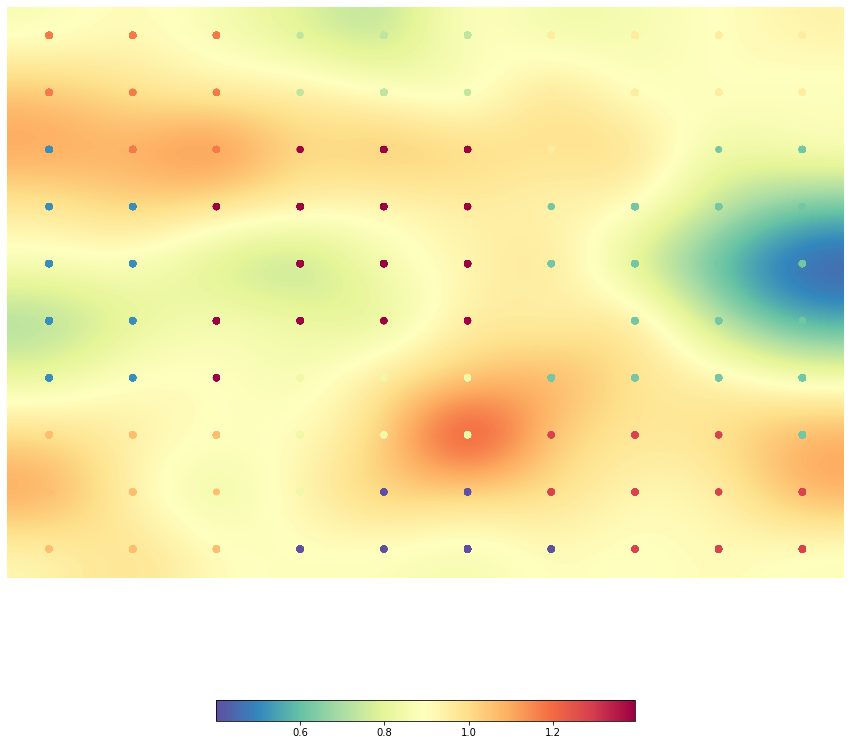

In [ ]:
n_rows, n_cols = 10, 10
som = somoclu.Somoclu(n_columns=n_cols, n_rows=n_rows, compactsupport=False)
%time som.train(final_set ,epochs=100)


som.cluster(algorithm=KMeans(n_clusters = 10))
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))
clusters = som.clusters

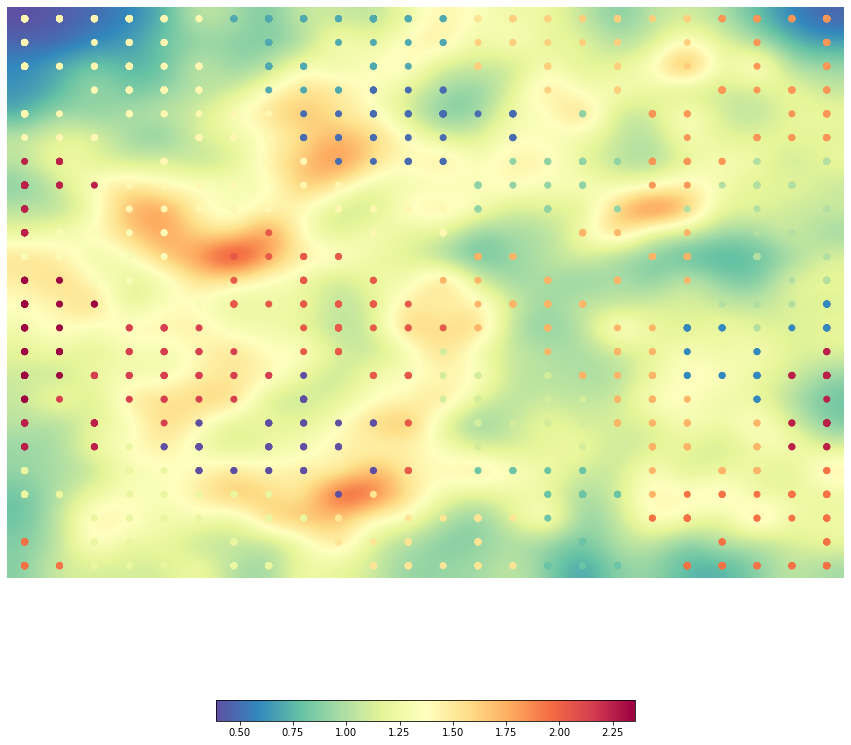

In [ ]:
from sklearn.cluster import KMeans
som.cluster(algorithm=KMeans(n_clusters = 20))
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))
clusters = som.clusters

In [ ]:
print(clusters)
print(neurons_per_cluster(clusters))

[[10 10 10 10 10 10  3  3  3  3  3  3  3 11 12 12 12 12 12 12 14 14 14 14]
 [10 10 10 10 10 10  3  3  3  3  3  3  3 12 12 12 12 12 12 12 14 14 14 14]
 [10 10 10 10 10 10  3  3  3  3  3  3  1 12 12 12 12 12 12 12 14 14 14 14]
 [10 10 10 10 10 10 10  3  3  3  1  1  1  1  1 12 12 12 14 14 14 14 14 14]
 [10 10 10 10 10 10 10 10  1  1  1  1  1  1  1  1  5 14 14 14 14 14 14 14]
 [10 10 10 10 10 10 10 10  1  1  1  1  1  1  1  5  5  5 14 14 14 14 14 14]
 [18 18 10 10 10 10 10 10 10  1  1  1  1  5  5  5  5  5 14 14 14  6  6  6]
 [18 18 18 10 10 10 10 10 10 10 10  1  5  5  5  5  5  5 14 14  6  6  6  6]
 [18 18  9 10 10 10 10 10 10 10 10 10 10  5  5  5  5  5 13  6  6  6  6  6]
 [18  9  9  9  9 10 10 16 10 10 10 10 10 13 13  5 13 13 13 13  6  6  6  6]
 [ 9  9  9  9  9  9 16 16 16 16 16 10 13 13 13 13 13 13 13 13  6  6  6  6]
 [19 19  9  9  9  9 16 16 16 16 16 16 13 13 13 13 13 13 13 13  6  6  6  6]
 [19 19 19  9  9  9 16 16 16 16 16 16 13 13 13 13 13 13 13  2  6  6  6  2]
 [19 19 19 17 17 17 16 16

Ας εξετάσουμε στην συνέχεια το πλήθος των συνηθέστερων κατηγοριών ταινιών στο ολοκληρωμένο dataset των 5000 που ανατέθηκαν στην ομάδα μας και στο επιμέρους τμήμα 2000 ταινιών που επιλέχθηκαν τυχαία για την εκπαίδευση του SOM. 

In [ ]:
print(categories_stats(range(5000), max_genre=15))
print(categories_stats(sample_indexes, max_genre=15))

[('Drama', 2281), ('Comedy', 1250), ('Thriller', 805), ('Romance Film', 764), ('Action', 731), ('World cinema', 639), ('Horror', 515), ('Crime Fiction', 498), ('Action/Adventure', 456), ('Black-and-white', 444), ('Indie', 418), ('Adventure', 403), ('Short Film', 382), ('Family Film', 364), ('Musical', 308)]
[('Drama', 904), ('Comedy', 494), ('Thriller', 339), ('Romance Film', 296), ('Action', 294), ('World cinema', 253), ('Horror', 211), ('Crime Fiction', 202), ('Black-and-white', 180), ('Action/Adventure', 175), ('Short Film', 164), ('Adventure', 163), ('Indie', 155), ('Family Film', 146), ('Animation', 120)]


Στην συνέχεια θα δοκιμάσουμε να εκπαιδεύσουμε μια σειρά από μικρούς χάρτες με δεδομένα σε διάφορα στάδια προεπεξεργασίας. Σκοπός μας είναι να προσδιορίσουμε αν 1. η χρήση κάποιας μορφής κλιμάκωσης (standard ή minmax scaling) θα βοηθήσουν την ομαδοποίηση των χαρτών και 2. εάν η χρήση PCA μπορεί περαιτέρω να μειώσει τον χρόνο και να βελτιώσει την ακρίβεια της εκπαίδευσης.

Για τους χάρτες που ακολουθούν χρησιμοποιούμε το σύνολο των 5000 ταινιών.

###10x10 - final_build_set - rect

Ξεκινάμε την εκπαίδευση με το πλήρες σε δεδομένων, χωρίς προεπεξεργασία.

CPU times: user 3min 18s, sys: 422 ms, total: 3min 18s
Wall time: 1min 40s


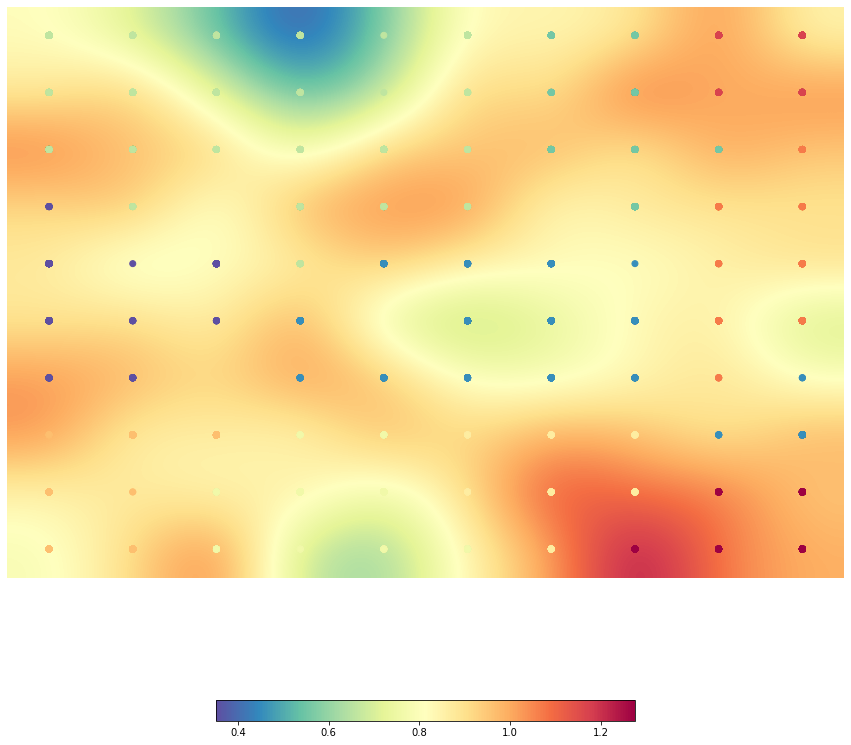

[[3 3 3 3 3 3 2 2 8 8]
 [3 3 3 3 3 3 2 2 8 8]
 [3 3 3 3 3 3 2 2 2 7]
 [0 3 3 3 3 3 2 2 7 7]
 [0 0 0 3 1 1 1 1 7 7]
 [0 0 0 1 1 1 1 1 7 7]
 [0 0 6 1 1 1 1 1 7 1]
 [6 6 6 4 4 5 5 5 1 1]
 [6 6 4 4 4 5 5 5 9 9]
 [6 6 4 4 4 4 5 9 9 9]]
*** In cluster 0, UBMUS: 9***
[('Drama', 369), ('Romance Film', 360), ('Romantic drama', 241), ('World cinema', 133), ('Musical', 55)]
*** In cluster 1, UBMUS: 16***
[('Short Film', 114), ('Documentary', 103), ('Comedy film', 84), ('Romance Film', 74), ('Musical', 69)]
*** In cluster 2, UBMUS: 8***
[('Thriller', 388), ('Drama', 210), ('Mystery', 157), ('Crime Fiction', 155), ('Crime Thriller', 124)]
*** In cluster 3, UBMUS: 23***
[('Drama', 1329), ('World cinema', 214), ('Black-and-white', 159), ('Action', 153), ('Crime Fiction', 145)]
*** In cluster 4, UBMUS: 9***
[('Comedy', 511), ('Black-and-white', 128), ('Short Film', 86), ('Family Film', 64), ('Musical', 60)]
*** In cluster 5, UBMUS: 7***
[('Action', 267), ('Action/Adventure', 126), ('Comedy', 123), ('A

In [ ]:
data = build_final_set()
n_rows, n_cols = 10, 10
som = somoclu.Somoclu(n_columns=n_cols, n_rows=n_rows, compactsupport=False)
%time som.train(data, epochs=100)


som.cluster(algorithm=KMeans(n_clusters = 10))
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))
clusters = som.clusters

print(clusters)
for i in range(10):
  print(cluster_neurons_movies_report(i, clusters, ubmus, bmus, 5))

###10x10 - scaled standard - rect


CPU times: user 3min 46s, sys: 734 ms, total: 3min 47s
Wall time: 1min 55s


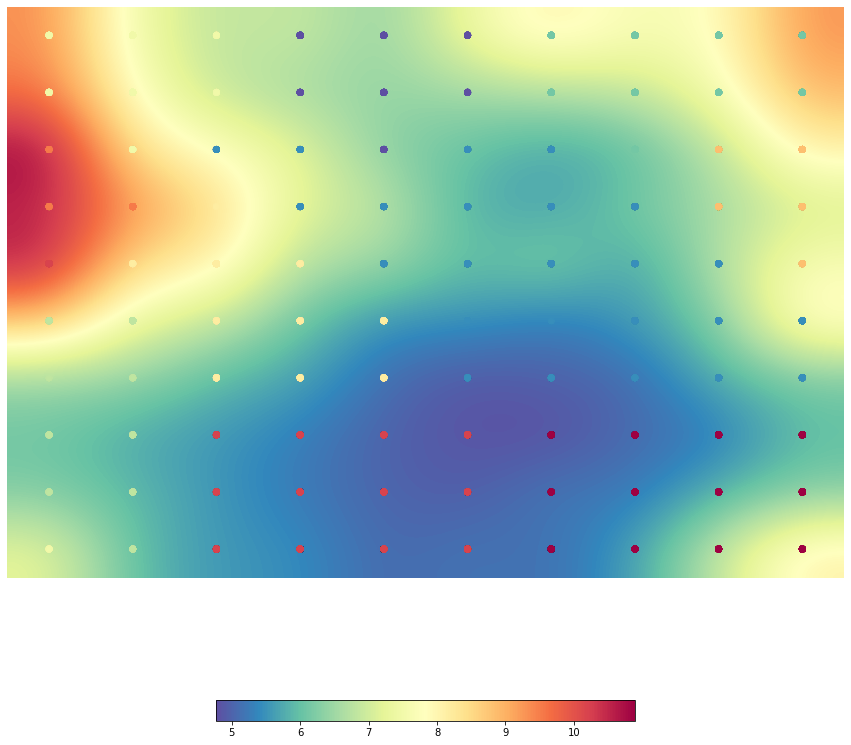

[[4 4 4 0 0 0 2 2 2 2]
 [4 4 4 0 0 0 2 2 2 2]
 [7 4 1 1 0 1 1 2 6 6]
 [7 7 5 1 1 1 1 1 6 6]
 [8 5 5 5 1 1 1 1 1 6]
 [3 3 5 5 5 1 1 1 1 1]
 [3 3 5 5 5 1 1 1 1 1]
 [3 3 8 8 8 8 9 9 9 9]
 [3 3 8 8 8 8 9 9 9 9]
 [4 3 8 8 8 8 9 9 9 9]]
*** In cluster 0, UBMUS: 7***
[('Short Film', 229), ('Comedy', 135), ('Animation', 129), ('Family Film', 101), ('Black-and-white', 75)]
*** In cluster 1, UBMUS: 24***
[('Drama', 428), ('Comedy', 244), ('Documentary', 95), ('Adventure', 88), ('Romance Film', 85)]
*** In cluster 2, UBMUS: 9***
[('Action', 322), ('Action/Adventure', 261), ('Thriller', 215), ('Drama', 198), ('Crime Fiction', 170)]
*** In cluster 3, UBMUS: 9***
[('Drama', 287), ('Comedy', 188), ('Romance Film', 150), ('Thriller', 94), ('Romantic drama', 64)]
*** In cluster 4, UBMUS: 8***
[('Horror', 222), ('Science Fiction', 193), ('Thriller', 128), ('Action', 107), ('Adventure', 86)]
*** In cluster 5, UBMUS: 10***
[('Comedy', 257), ('Drama', 210), ('Romance Film', 194), ('Romantic comedy', 129), 

In [ ]:
data = final_set_scaled1
n_rows, n_cols = 10, 10
som = somoclu.Somoclu(n_columns=n_cols, n_rows=n_rows, compactsupport=False)
%time som.train(data, epochs=100)


som.cluster(algorithm=KMeans(n_clusters = 10))
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))
clusters = som.clusters

print(clusters)
for i in range(10):
  print(cluster_neurons_movies_report(i, clusters, ubmus, bmus, 5))

Αξίζει εδώ να σημειώσουμε ότι η χρήση των δεδομένων χωρίς προεπεξεργασία φαίνεται να παράγει καλύτερη ομαδοποίηση από την χρήση του dataset `final_set_scaled1`, στο οποίο θυμίζουμε είχαμε εφαρμόσει standard scaler στα χαρακτηριστικά του corpus και στην συνέχεια είχαν προστεθεί τα χαρακτηριστικά του catbins. Επιλέγουμε λοιπόν να μην ασχοληθούμε περισσότερο με αυτή την προεπεξεργασία.

### 10x10 scaled minmax - rect



CPU times: user 3min 18s, sys: 450 ms, total: 3min 18s
Wall time: 1min 40s


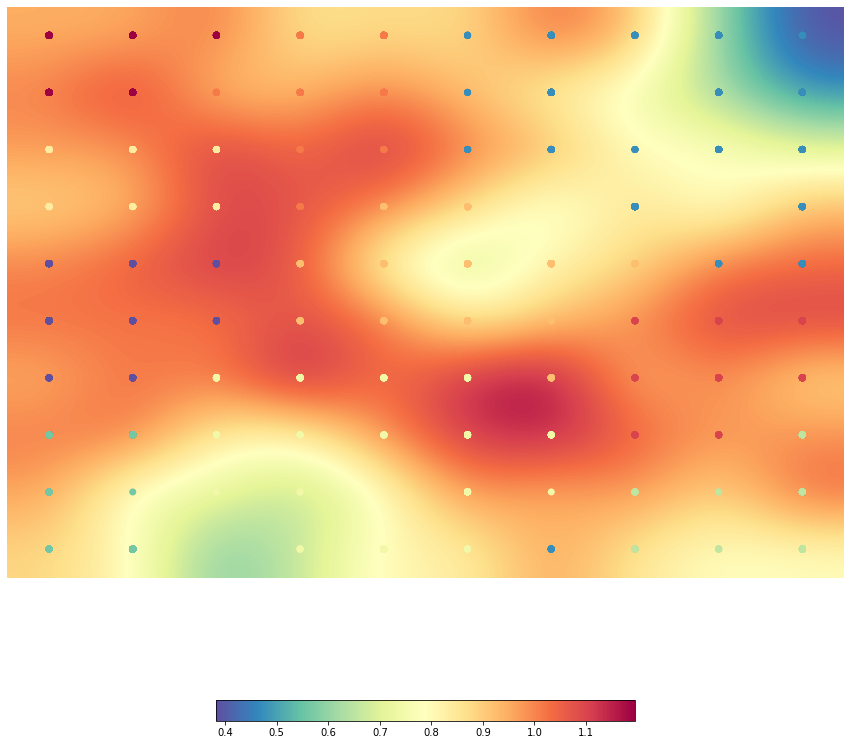

[[9 9 9 7 7 1 1 1 1 1]
 [9 9 7 7 7 1 1 1 1 1]
 [5 5 5 7 7 1 1 1 1 1]
 [5 5 5 7 6 6 6 1 1 1]
 [0 0 0 6 6 6 6 6 1 1]
 [0 0 0 6 6 6 6 8 8 8]
 [0 0 4 4 4 4 6 8 8 8]
 [2 2 4 4 4 4 4 8 8 3]
 [2 2 4 4 4 4 4 3 3 3]
 [2 2 2 4 4 4 1 3 3 3]]
*** In cluster 0, UBMUS: 8***
[('Action', 335), ('Action/Adventure', 155), ('Adventure', 153), ('Drama', 120), ('Science Fiction', 72)]
*** In cluster 1, UBMUS: 19***
[('Drama', 1218), ('World cinema', 269), ('Comedy', 178), ('Indie', 136), ('Black-and-white', 106)]
*** In cluster 2, UBMUS: 6***
[('Horror', 370), ('Science Fiction', 143), ('Thriller', 110), ('Slasher', 85), ('World cinema', 47)]
*** In cluster 3, UBMUS: 7***
[('Romance Film', 467), ('Drama', 405), ('Romantic drama', 235), ('World cinema', 127), ('Comedy', 68)]
*** In cluster 4, UBMUS: 16***
[('Short Film', 256), ('Animation', 238), ('Family Film', 180), ('Documentary', 104), ('Adventure', 103)]
*** In cluster 5, UBMUS: 6***
[('Action/Adventure', 210), ('Action', 208), ('Thriller', 187), ('Cri

In [ ]:
data = final_set_scaled2
n_rows, n_cols = 10, 10
som = somoclu.Somoclu(n_columns=n_cols, n_rows=n_rows, compactsupport=False)
%time som.train(data, epochs=100)


som.cluster(algorithm=KMeans(n_clusters = 10))
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))
clusters = som.clusters

print(clusters)
for i in range(10):
  print(cluster_neurons_movies_report(i, clusters, ubmus, bmus, 5))

Πάλι, η χρήση καθ' αποκλειστικότητα του minmax scaled dataset για την εκπαίδευση του χάρτη φαίνεται ανεπαρκής. Τα clusters που δημιουργούνται έχουν σημαντική επικάλυψη μεταξύ τους, οπότε δεν φαίνεται να έχει γίνει καλή ομαδοποίηση. Χαρακτηριστικά, τα clusters 6 και 8 έχουν πιο συχνή κατηγορία την κωμωδία.

### PCA


In [ ]:
prepca = build_final_set()
print(prepca.shape)

(5000, 1294)


[0.07688387 0.14294112 0.19002473 0.2274394  0.26186508 0.29066208
 0.31627828 0.3402084  0.36211446 0.38046414 0.39738792 0.41362676
 0.42815602 0.4417788  0.453255   0.4645266  0.47499767 0.4848728
 0.4944313  0.5036257  0.5120904  0.5205024  0.5285638  0.5361189
 0.5432726  0.5501818  0.55697924 0.5634569  0.5697363  0.57597154
 0.58164287 0.58715945 0.5925451  0.5977075  0.6026221  0.6073
 0.61186206 0.61616415 0.62042946 0.6245312  0.6285165  0.63217336
 0.635793   0.63909    0.6423607  0.6454498  0.64838445 0.65125746
 0.6541224  0.6569376  0.65962934 0.662246   0.66482663 0.6673694
 0.6698747  0.67229784 0.6746467  0.67695636 0.67918974 0.68138975
 0.683548   0.68566906 0.6877324  0.6897696  0.69177574 0.6936865
 0.6955433  0.6973812  0.69916886 0.70092314 0.70263857 0.7042997
 0.7059311  0.70753914 0.70911855 0.7106617  0.71218675 0.71369183
 0.7151872  0.7166292  0.718043   0.7194231  0.72078395 0.72213316
 0.7234556  0.7247478  0.7260097  0.72724813 0.72848046 0.729701
 0.730

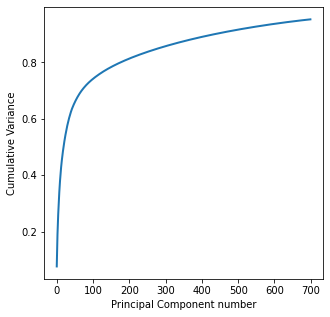

In [ ]:
import matplotlib.pyplot as plt

pca = PCA(n_components = 700, random_state=0)
pca.fit(prepca)
data = pca.transform(prepca)

evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

###10x10 only PCA - rect


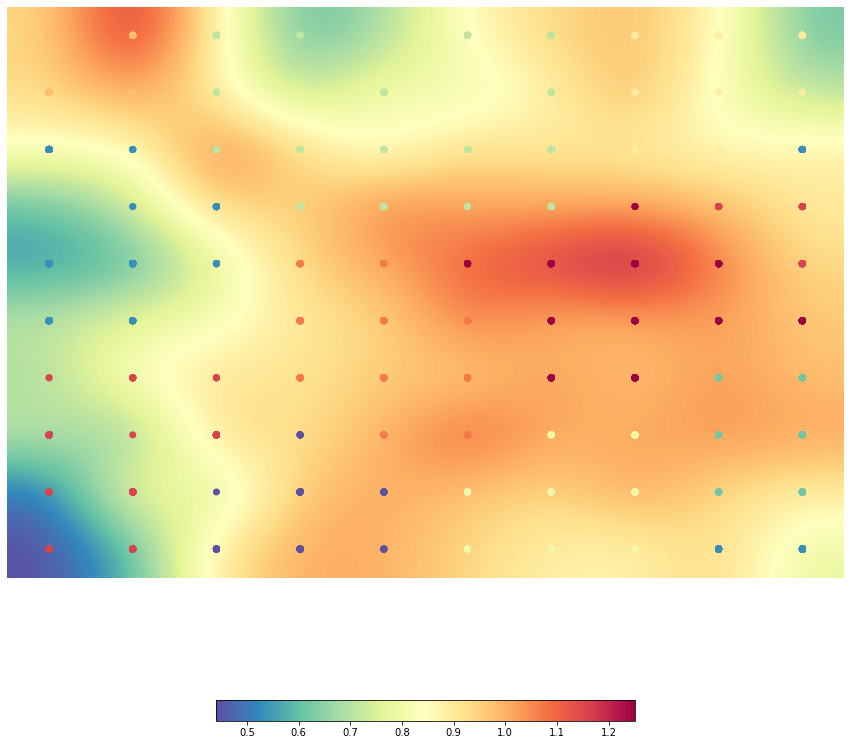

[[6 6 3 3 3 3 3 5 5 5]
 [6 6 3 3 3 3 3 5 5 5]
 [1 1 3 3 3 3 3 5 5 1]
 [1 1 1 3 3 3 3 9 8 8]
 [1 1 1 7 7 9 9 9 9 8]
 [1 1 8 7 7 7 9 9 9 9]
 [8 8 8 7 7 7 9 9 2 2]
 [8 8 8 0 7 7 4 4 2 2]
 [8 8 0 0 0 4 4 4 2 2]
 [8 8 0 0 0 4 4 4 1 1]]
*** In cluster 0, UBMUS: 7***
[('World cinema', 234), ('Drama', 213), ('Bollywood', 71), ('Musical', 60), ('Thriller', 30)]
*** In cluster 1, UBMUS: 12***
[('Horror', 219), ('Short Film', 111), ('Documentary', 101), ('Comedy film', 74), ('Silent film', 71)]
*** In cluster 2, UBMUS: 6***
[('Science Fiction', 218), ('Horror', 97), ('Action', 72), ('Thriller', 59), ('Adventure', 54)]
*** In cluster 3, UBMUS: 17***
[('Comedy', 867), ('Drama', 193), ('Black-and-white', 157), ('Romance Film', 151), ('Romantic comedy', 131)]
*** In cluster 4, UBMUS: 8***
[('Thriller', 356), ('Horror', 132), ('Drama', 118), ('Mystery', 116), ('Psychological thriller', 78)]
*** In cluster 5, UBMUS: 8***
[('Romance Film', 443), ('Drama', 441), ('Romantic drama', 258), ('Comedy', 137), 

In [ ]:
n_rows, n_cols = 10, 10
som = somoclu.Somoclu(n_columns=n_cols, n_rows=n_rows, compactsupport=False)
%time som.train(data, epochs=100)

from sklearn.cluster import KMeans
som.cluster(algorithm=KMeans(n_clusters = 10))
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))
clusters = som.clusters

print(clusters)
for i in range(10):
  print(cluster_neurons_movies_report(i, clusters, ubmus, bmus, 5))

### 10x10 PCA & MinMax - rect

[0.04627228 0.0865529  0.11486674 0.13771388 0.15846638 0.17567496
 0.19126163 0.20631953 0.2195319  0.23067057 0.24088015 0.25088105
 0.25991672 0.2682541  0.27592313 0.28308114 0.28992024 0.29624873
 0.30227894 0.308168   0.3137475  0.31885144 0.32393003 0.32890755
 0.33353058 0.3378955  0.34216154 0.34635526 0.3504619  0.35434458
 0.35815242 0.36178896 0.36532402 0.3688513  0.37214288 0.3753283
 0.37841454 0.38142088 0.3843022  0.38707268 0.38982877 0.3924674
 0.3950666  0.39760494 0.40008584 0.40251818 0.40493217 0.40727386
 0.40959457 0.4119131  0.41418758 0.41645023 0.41865104 0.42082718
 0.42299417 0.42514318 0.4272604  0.42933545 0.43139118 0.43341184
 0.4354106  0.43739182 0.4393681  0.44131926 0.4432412  0.4451447
 0.44701886 0.44888237 0.45073685 0.4525759  0.45440984 0.4562283
 0.4580396  0.45982176 0.4615936  0.46334347 0.4650765  0.46680516
 0.46851274 0.47021437 0.47190675 0.4735874  0.475248   0.47689748
 0.47853684 0.48015925 0.4817732  0.48337927 0.4849722  0.48655778

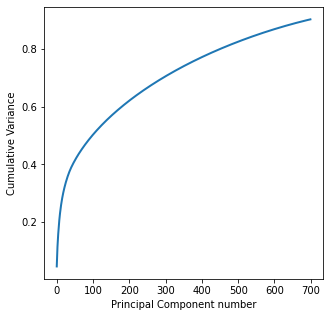

CPU times: user 2min 9s, sys: 378 ms, total: 2min 9s
Wall time: 1min 5s


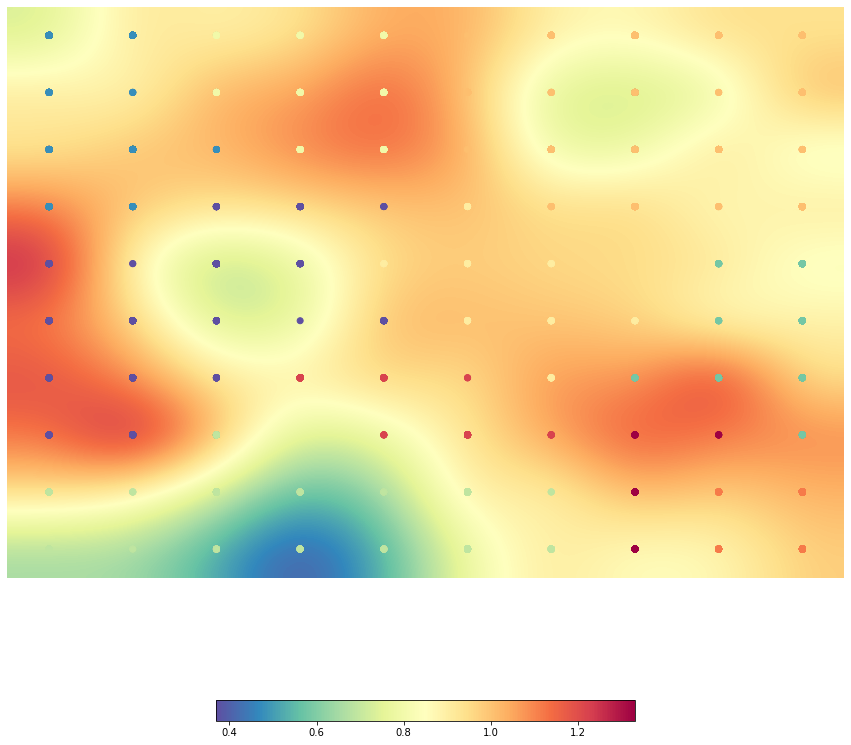

[[1 1 4 4 4 6 6 6 6 6]
 [1 1 4 4 4 6 6 6 6 6]
 [1 1 1 4 4 6 6 6 6 6]
 [1 1 0 0 0 5 6 6 6 6]
 [0 0 0 0 5 5 5 5 2 2]
 [0 0 0 0 0 5 5 5 2 2]
 [0 0 0 8 8 8 5 2 2 2]
 [0 0 3 3 8 8 8 9 9 2]
 [3 3 3 3 3 3 3 9 7 7]
 [3 3 3 3 3 3 3 9 7 7]]
*** In cluster 0, UBMUS: 17***
[('Comedy', 618), ('Family Film', 179), ('Black-and-white', 139), ('Short Film', 135), ('Animation', 89)]
*** In cluster 1, UBMUS: 9***
[('Horror', 453), ('Thriller', 268), ('Science Fiction', 104), ('Slasher', 90), ('Mystery', 75)]
*** In cluster 2, UBMUS: 8***
[('Drama', 355), ('Romance Film', 353), ('Romantic drama', 214), ('World cinema', 107), ('Musical', 51)]
*** In cluster 3, UBMUS: 15***
[('Drama', 1044), ('World cinema', 243), ('Black-and-white', 89), ('Musical', 80), ('War film', 74)]
*** In cluster 4, UBMUS: 8***
[('Action', 379), ('Action/Adventure', 347), ('Thriller', 235), ('Drama', 123), ('World cinema', 106)]
*** In cluster 5, UBMUS: 8***
[('Comedy', 261), ('Romance Film', 254), ('Romantic comedy', 196), ('Drama'

In [ ]:
pca = PCA(n_components = 700, random_state=0)
pca.fit(final_set_scaled2)
data = pca.transform(final_set_scaled2)

evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

n_rows, n_cols = 10, 10
som = somoclu.Somoclu(n_columns=n_cols, n_rows=n_rows, compactsupport=False)
%time som.train(data, epochs=100)

from sklearn.cluster import KMeans
som.cluster(algorithm=KMeans(n_clusters = 10))
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))
clusters = som.clusters

print(clusters)
for i in range(10):
  print(cluster_neurons_movies_report(i, clusters, ubmus, bmus, 5))

Συγκρίνοντας τις 2 παραπάνω υλοποιήσεις, επιλέγουμε να χρησημοποιήσουμε δεδομένα κλιμακωμένα με minmax scaling και στη συνέχεια να εφαρμόσουμε PCA.

## Τελικός Χάρτης με όλα τα Δεδομένα

In [ ]:
som = joblib.load("som_final_30x30.pkl")

Έπειτα από διάφορους πειραματισμούς με διαφορετικά μεγέθη Dataset και διαφορετικά μεγεθή χαρτών, προχωράμε στην κατασκευή του τελικού μας χάρτη που περιέχει ολόκληρο το Dataset. 

Διαλέξαμε ο χάρτης αυτός να έχει διαστάσεις 30x30, διότι με αυτό το μέγεθος είδαμε το αποτελέσμα που θέλαμε, δηλαδή ο χάρτης να έχει πράσινο-μπλε περιοχές, που δηλώνουν έναν ξεκάθαρο πυρήνα καθώς και κόκκινες περιοχές που δηλώνουν όρια μεταξύ Clusters.

Για την ομαδοποίηση των περιοχών που δημιουργήθηκαν, αφού εξετάσαμε εποπτικά το U-Matrix, επιλέξαμε τον αλγόριθμο KMeans από την sklearn.cluster με 25 πυρήνες.

Δημιουργία dataset και προεπεξεργασία δεδομένων

In [ ]:
dataset = build_final_set()

scaler = MinMaxScaler()
scaler.fit(dataset)
scaled_dataset = scaler.transform(dataset)

pca = PCA(n_components= 700, random_state=0)
pca.fit(scaled_dataset)
data = pca.transform(scaled_dataset)

Εκπαίδευση SOM και Εμφάνιση U-Matrix

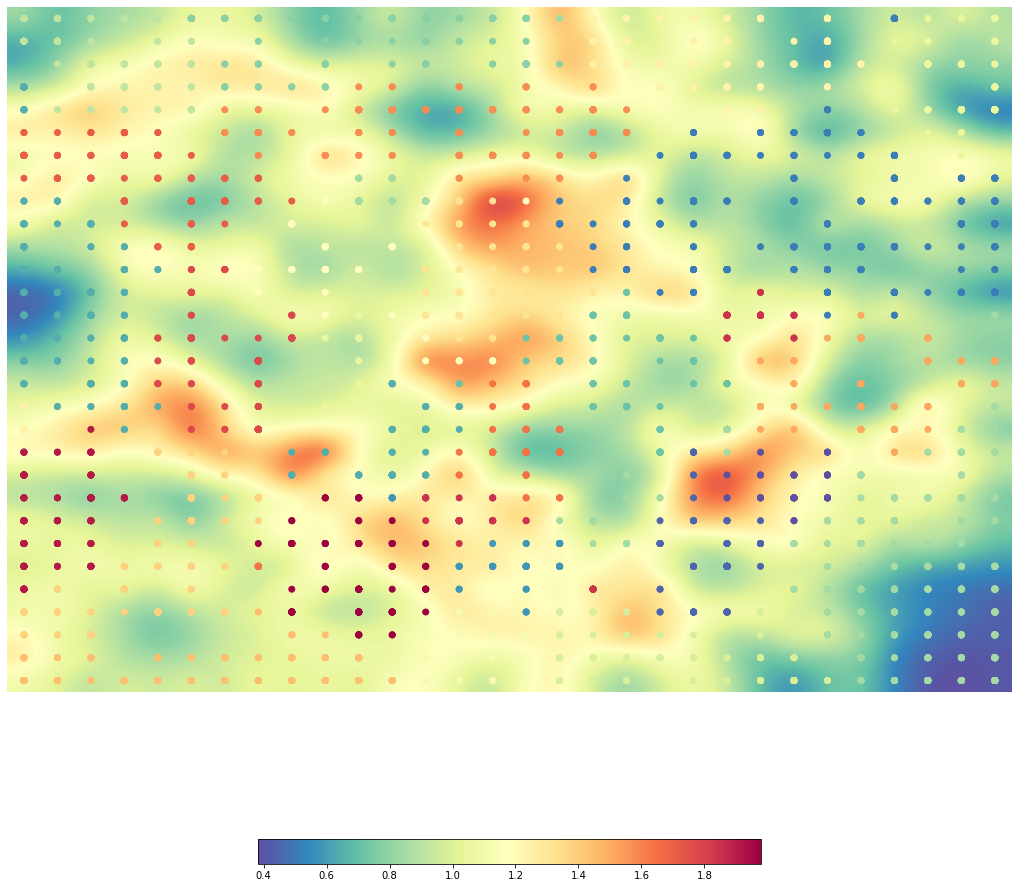

In [ ]:
n_cols, n_rows = 30, 30
som = somoclu.Somoclu(n_columns=n_cols, n_rows=n_rows, compactsupport=False)
%time som.train(data, epochs=100)
joblib.dump(som, "som_final_30x30.pkl")

from sklearn.cluster import KMeans
som.cluster(algorithm=KMeans(n_clusters = 25))
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(18, 18))
clusters = som.clusters

Εξετάζοντας το παραπάνω U-Matrix, βλέπουμε ότι έχει γίνει ένας καλός διαχωρισμός των εισόδων μας, καθώς και ομαδοποίση των BMUs. 

Προς τα κάτω και δεξιά του χάρτη βλέπουμε μια μεγάλη περιοχή με ένα σκούρο μπλε - πράσινο χρώμα. Αυτό σημαίνει ότι τα δεδομένα που κατανομήθηκαν σε αυτή την περιοχή είναι αρκετά όμοια για αυτό και η απόσταση των νευρώνων είναι μικρή.

Στο κέντρο και αριστερά στον χάρτη βλέπουμε μια πιο μικρή περιοχή που είναι όμως πιο σκούρα μπλε. Αυτό σημαίνει ότι έχουμε λιγότερα δεδομένα αυτού του είδους, αλλά μοιάζουν πιο πολύ μεταξύ τους.

 Σε γενικές γραμμές, έχουμε καταφέρει καλές ομαδοποιήσεις και σημεία που είναι προφανή σύνορα μεταξύ ανόμοιων δεδομένων (κόκκινες περιοχές).

### Βαθύτερη Ανάλυση 3 Cluster

Τώρα θα προχωρήσουμε σε μια πιο αναλυτική και όχι τόσο εποπτική ανάλυση. Στην ανάλυση αυτή θα βασιστούμε στις κατηγοριές που έχει η κάθε ταινία. Αυτή η μέθοδος έχει το καλό ότι χαρακτηρίζουμε με μερικές λέξεις κάποιες ταινίες χωρίς να χρειαστεί να διαβάσουμε ολόκληρη την περιγραφή. Όμως, δεν μπορούμε να βασιστούμε αποκλειστικά σε αυτόν τον τρόπο, διότι, μια ταινία να έχει λιγότερες κατηγορίες από ότι θα πρέπει ή να έχει γίνει κάποιο λάθος στον χαρακτηρισμό τους.

Αρχικά τυπώνουμε τα IDs των Cluster που ανήκει κάθε Νευρώνας του χάρτη μας.
Έπειτα τυπώνουμε τα είδη των ταινιών που ανήκουν σε κάθε Cluster ώστε να μπορέσουμε να εξηγήσουμε σημασιολογικά τον χάρτη. 

In [ ]:
for i in clusters:
  for j in i:
    if j > 9:
      print(j, end=' ')
    else:
      print(j, end='  ')
  print()
  print()

8  8  8  8  8  6  6  6  6  6  6  6  6  6  6  6  7  13 13 13 13 13 13 13 13 2  2  10 10 10 

8  8  8  8  8  8  6  6  6  6  6  6  6  6  6  6  13 13 13 13 13 13 13 13 13 13 10 10 10 10 

8  8  8  8  8  8  6  6  6  6  6  6  6  6  6  6  6  13 13 13 13 13 13 13 13 13 10 10 10 10 

4  8  8  8  8  8  6  6  6  6  18 18 18 18 18 18 18 18 13 13 13 13 13 13 13 13 10 10 10 10 

4  8  8  8  8  8  18 18 18 18 18 18 18 18 18 18 18 18 18 13 13 13 13 2  2  2  10 10 10 10 

20 20 20 20 20 20 18 18 18 18 18 18 18 18 18 18 18 18 18 2  2  2  2  2  2  2  2  10 10 10 

20 20 20 20 20 20 20 18 18 18 18 18 18 18 18 18 18 18 18 2  2  2  2  2  2  2  2  2  10 10 

20 20 20 20 20 20 20 20 20 12 7  7  7  18 18 18 18 18 2  2  2  2  2  2  2  2  2  2  2  2  

4  4  20 20 20 20 20 20 20 12 7  7  7  14 14 12 2  2  2  2  2  2  2  2  2  2  2  2  2  2  

4  4  4  20 20 20 20 20 12 12 7  12 14 14 14 14 2  2  2  2  2  2  2  2  2  2  2  2  2  2  

4  4  4  4  20 20 20 12 12 12 12 12 12 14 14 14 14 2  2  2  2  2  2  2  2  2  2 

In [ ]:
for i in range(25):
  print(cluster_neurons_movies_report(i, max_genre=7))
  print()

*** In cluster 0, UBMUS: 11***
[('Drama', 41), ('Biographical film', 31), ('Biopic [feature]', 30), ('Biography', 29), ('Period piece', 25), ('Television movie', 8), ('Historical fiction', 7)]

*** In cluster 1, UBMUS: 17***
[('Drama', 80), ('War film', 78), ('Action', 20), ('World cinema', 18), ('History', 17), ('Period piece', 12), ('Adventure', 9)]

*** In cluster 2, UBMUS: 68***
[('Documentary', 90), ('Comedy film', 65), ('Japanese Movies', 60), ('Science Fiction', 51), ('Silent film', 49), ('Animation', 34), ('Musical', 30)]

*** In cluster 3, UBMUS: 11***
[('Action', 49), ('Action/Adventure', 49), ('Drama', 40), ('Adventure', 33), ('War film', 13), ('Comedy', 11), ('Film adaptation', 8)]

*** In cluster 4, UBMUS: 52***
[('Comedy', 410), ('Action', 58), ('Parody', 50), ('Musical', 36), ('Indie', 33), ('Crime Fiction', 33), ('Action/Adventure', 31)]

*** In cluster 5, UBMUS: 24***
[('Adventure', 121), ('Action', 67), ('Science Fiction', 37), ('Fantasy', 36), ('Drama', 19), ('Family

In [ ]:
print(neurons_per_cluster(clusters))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[ 12  22 102  13  63  33  36  93  27  29  35  14  28  42  28  43  28  36
  51  21  37  33  19  24  31]
***Clusters sorted by number of neurons***
Cluster label
Neurons per cluster
0   3   11  22  19  1   23  8   16  14  12  9   24  5   21  10  6   17  20  13  15  18  4   7   2  
12  13  14  19  21  22  24  27  28  28  28  29  31  33  33  35  36  36  37  42  43  51  63  93  102


Όπως βλέπουμε από την εκτύπωση των Clusters:
* Η μεγάλη περιοχή στην οποία αναφερθήκαμε προηγουμένως, αντιστοιχεί στο Cluster 7, το οποίο περιέχει 76 Unique Best Matching Units (Νευρώνες). Το Cluster αυτό περιέχει 821 ταινίες με την κατηγορία Drama, σημαντικά λιγότερες "Crime Fiction" ταινίες με 107, λίγες "Indie" και "Action" ταινίες με 70 και 66 ταινίες σε κάθε κατηγορία αντίστοιχα. Περιέχει επίσης, "Family Film" ταινίες με 44, "Family Drama" ταινίες με 42 και τέλος 35 "Film adaptation" ταινίες. Από τη μεγαλή διαφορά μεταξύ των ποσοτήτων των κατηγοριών, μπορούμε να καταλήξουμε στο συμπέρασμα ότι αυτό το Cluster είναι ταινίες Drama όπου τα δευτερεύοντα είδη τους είναι τα υπόλοιπα. Επίσης αξίζει να σημειωθεί ότι τα είδη ταινιών σε αντίστοιχα Cluster άλλων χαρτών που εκπαιδεύσαμε περιείχε τις ίδιες κατηγορίες ταινιών σε πολύ κοντινά πλήθη, πράγμα που επαληθεύει το προηγούμενο μας συμπέρασμα.

  ('Drama', 821), ('Crime Fiction', 107), ('Indie', 70), ('Action', 66), ('Family Film', 44), ('Family Drama', 42), ('Film adaptation', 35)]

* Η δεύτερη περιοχή στην οποία αναφερθήκαμε προηγουμένως και παρουσιάζει πολύ μεγάλη ομοιότητα, αντιστοιχεί στο Cluster 4 και έχει 52 UBMUs. Κατά την εκτέλεση του κώδικα για την ανάλυση του Cluster πήραμε τα παρακάτων αποτελέσματα:
  
  ('Comedy', 410), ('Action', 58), ('Parody', 50), ('Musical', 36), ('Indie', 33), ('Crime Fiction', 33), ('Action/Adventure', 31)

  Είναι πολύ εύκολο και εδώ να πούμε ότι το Cluster αυτό έχει ως βασική κατηγορία τις Κωμωδίες, για 2 λόγους. Πρώτον, ο αριθμός κωμωδιών είναι πολύ μεγαλύτερος από τον αριθμό των υπόλοιπων ειδών, αλλά και δεύτερον, όλες οι υπόλοιπες κατηγορίες είναι υποκατηγορίες της Κωμωδίας. Επίσης, αντίστοιχα με το προηγούμενο Cluster, σε άλλους χάρτες υπήρχαν παρόμοιοι πυρήνες με πολύ όμοιο συνδυασμό πλήθος ταινιών - κατηγορία ταινίας.

* Ενδιαφέρον παρουσιάζει το Cluster 2. Το Cluster αυτό βρίσκεται στα δεξία προς το κέντρο του χάρτη και είναι το μεγαλύτερο σε ποσότητα νευρώνων με 102 εκ των οποίων μόνο στους έχει ανατεθεί τουλάχιστον 1 ταινία. Παρουσιάζει ενδιαφέρον διότι, αντίθετα με τα 2 προηγούμενα Cluster που αναλύσαμε, αυτό πιάνει μια μεγάλη έκταση στον χάρτη αλλά το χρώμα του δεν είναι σκούρο μπλε, που σημαίνει πάρα πολύ μικρή διαφορά, αλλά θαλασσί προς κίτρινο, που σημαίνει πως μοιάζουν τα δεδομένα αλλά έχουν κάποιες διαφορές. Από την ανάλυση του Cluster παίρνουμε την παρακάτω έξοδο: 

  ('Documentary', 90), ('Comedy film', 65), ('Japanese Movies', 60), ('Science Fiction', 51), ('Silent film', 49), ('Animation', 34), ('Musical', 30)

  Όπως βλέπουμε πρόκειται για ένα Cluster που με μια πρώτη ματιά πιστεύουμε πως κάτι δεν έχει γίνει σωστά. Θα προσπαθήσουμε να δούμε πιο βαθειά γιατί έχει γίνει αυτή η ομαδοποίηση κοιτάζοντας τις περιγραφές τυχαίων ταινιών από εκεί.
  

In [ ]:
print(cluster_neurons_movies_plot(2,2))

*** In cluster 2, UBMUS: 68***
[('Documentary', 90), ('Comedy film', 65), ('Japanese Movies', 60), ('Science Fiction', 51), ('Silent film', 49)]
Title: Veera 
Summary:  Muthu  comes to the city from his village for a song contest. He meets Ravikanth  in the city and they both work hard for the song contest. Muthu tells Ravikanth about how he fell in love with Devayani  and how he got her to love him. Devayani is the daughter of a song teacher in his village. He came to this contest so he could win the money and pay off the loan his mother had to the village leader. They both work together and end up winning the song contest. Muthu then goes back to his village with joy and finds out a flood had come and Meena's house had been destroyed, it was reported that her father and her body had not been found. Muthu thinks that Meena is dead, and is very sad. He then goes and gives the money to the village leader, paying off his mother's debt. His mother takes him to the city so that they can fi

Είναι προφανές από τις πρώτες γραμμές κιόλας των περιγραφών, ότι αυτές οι ταινίες έχουν σχέση με το τραγούδι και διάφορες προσωπικότητες.

In [ ]:
print(cluster_neurons_movies_plot(2,2))

*** In cluster 2, UBMUS: 68***
[('Documentary', 90), ('Comedy film', 65), ('Japanese Movies', 60), ('Science Fiction', 51), ('Silent film', 49)]
Title: Luanda, The Music Factory 
Summary: In the middle of a Luanda slum , DJ Buda owns a recording studio, giving the opportunity to young singers to express themselves. Rhyming at Buda’s beats, kids shout out all their worries and everyday experiences to his old micro with an incredible energyhttp://www.publico.pt/Cultura/doclisboa-exibe-filme-angolano-sobre-kuduro-1405122. In the end they dance joyfully, laugh and listen to their own work with the inhabitants of the neighbourhood. A new music and parties' market is exploding with the new generation. 
Genres: ['"Documentary"']

Title: Maftuningman 
Summary: The movie tells the story of two filmmakers seeking talented people for acting in a musical entitled Maftuningman . One of the filmmakers travels to different parts of the Uzbek SSR in search of potential actors. Wherever he goes he meet

Αντίστοιχα με πριν, εδώ βλέπουμε ότι οι ταινίες πάλι σχετίζονται με μουσική και τέχνη.

Τελικά, όπως βλέπουμε, το Cluster αυτό δεν αφορά αποκλειστικά τα Ντοκιμαντέρ όπως φαίνεται από τις κατηγορίες, πράγμα που επαληθεύει αυτό που είχαμε πει αρχικά για την ανάλυση με χρήση κατηγοριών. Επίσης αν δούμε τον χάρτη θα δούμε ότι αυτό το Cluster περιέχει αρκετές κίτρινες περιοχές που σημαίνει ότι τα δεδομένα αυτά δεν είναι απολύτως όμοια όπως στα προηγούμενα Cluster, οπότε ήταν αναμενόμενη η πολυμορφία αυτών.

###Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

####1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.

In [ ]:
print(categories_stats(range(5000), max_genre= 20))

[('Drama', 2281), ('Comedy', 1250), ('Thriller', 805), ('Romance Film', 764), ('Action', 731), ('World cinema', 639), ('Horror', 515), ('Crime Fiction', 498), ('Action/Adventure', 456), ('Black-and-white', 444), ('Indie', 418), ('Adventure', 403), ('Short Film', 382), ('Family Film', 364), ('Musical', 308), ('Science Fiction', 308), ('Animation', 291), ('Romantic drama', 289), ('Mystery', 267), ('Romantic comedy', 235)]


Το Dataset μας, περιέχει 2281 ταινίες με την κατηγορία Drama, δηλαδή ένα ποσοστό 46%. Κοιτάζοντας τα αποτελέσματα μας, γρήγορα βλέπουμε ότι οι περιοχές με τους περισσότερες νευρώνες είναι οι περιοχές που περιέχουν την κατηγορία "Drama". Συγκεκριμένα, το μεγαλύτερο μας Cluster που αποτελείται από 87 νευρώνες, περιέχει 826 τέτοιες ταινίες.

Ο χάρτης μας έχει 900 νευρώνες, από αυτούς μόλις στους 715 έχει ανατεθεί τουλάχιστον μια ταινία. Η κατηγορία "Drama" βρέθηκε στις Top 7 κατηγορίες σε 16 από τα 25 Clusters, στους οποίους ανήκουν οι 420 νευρώνες. Από αυτό καταλαβαίνουμε ότι, όντως, δεδομένα με μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες. 

Μια κατηγορία ταινιών με μικρή πυκνότητα πιθανότητας είναι η "Romantic Comedy" με ποσοστό 4.7% επί το συνολικό πλήθος ταινιών. Οι 177 από αυτές βρίσκονται μόλις σε 1 Cluster στις Top 7 κατηγορίες με τις περισσότερες εμφανίσεις με μόλις 24 Νευρώνες. 

Τέλος θα εξετάσουμε μια μέση κατηγορία με μεσαία πυκνότητα πιθανότητας, την "Thriller" με ποσοστό εμφάνισης 16.1% επί το συνολικό πλήθος. Το είδος αυτό μπορούμε να το βρούμε σε 7 Clusters στις Top 7 κατηγορίες, μάλιστα στα 2 από αυτά είναι και η πολυπληθέστερη κατηγόρια. Οι νευρώνες που περιέχονται σε αυτά τα Clusters είναι 133 από τα 715.

Μετά από την ανάλυση αυτή, φτάνουμε στο συμπέρασμα ότι τα δεδομένα που εμφανίζονται συχνά απαιτούν περισσότερους νευρώνες από πιο σπάνια δεδομένα.

####2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.

Χαρακτηριστικό παράδειγμα για μακρινά πρότυπα εισόδου αποτελούν τα είδη "Comedy" με "Horror"/"Thriller". Από την μια έχουμε οικογενειακές ταινίες που προκαλούν γέλιο, ενώ από την άλλη, βίαιες ταινίες ή με ταινίες με ψυχολογικό τρόμο που μόνο γέλιο δεν προκαλούν.

*Σημείωση: Υπάρχει και το είδος Μαύρη Κωμωδία που αρκετές φορές περιέχει μορφές βίας(είτε λεκτική είτε σωματική) ή θανατού γενικά. Για αυτό παρακάτω θα δούμε ότι υπάρχει κομμάτι του χάρτη που είναι κοντά αυτά τα 2.*

Από τις προηγούμενες εκτελέσεις κώδικα, βρίσκουμε ότι τα Clusters που υπερτερεί το είδος "Comedy" είναι τα Clusters 4, 8 και 20. Από αυτά, μόνο το 4 είναι αποκλειστικά "Comedy". Τα άλλα 2 σχετίζονται με "Comedy-Drama" και "Romance-Drama-Comedy". Για τις ταινίες τρόμου τα Clusters είναι τα 13 και 23. Εδώ αποκλειστικά με Horror είναι το 13 ενώ το 23 είναι πιο πολύ Horror-Thriller δηλαδή ταινίες που προκαλούν άγχος και τρόμο.

Κοιτώντας τον χάρτη και την εκτύπωση των νευρώνων βλέπουμε ότι τα Cluster 4,8,20 βρίσκονται στα αριστέρα προς τα πάνω ενώ το 13 βρίσκεται, στην άλλη άκρη του χάρτη, στα δεξία. Το Cluster 23 συνορεύει με τα Clusters των Κωμωδιών αλλά βλέπουμε στον Χάρτη ότι ανάμεσα τους υπάρχουν "άδειοι" νευρώνες που δεν τους έχει ανατεθεί καμία ταινία και είναι κόκκινος σε αυτά τα σημεία που σημαίνει ότι απέχουν πολύ.

Κάτι αντίστοιχο ισχύει με τις ταινίες Romance. Αυτές απασχολούν τo Cluster 18 που βρίσκεται στο κέντρο του χάρτη και απέχει αρκετά από ταινίες Thriller και Horror

####3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Στο κομμάτι αυτό θα επικεντρωθούμε σε λιγότερο συχνά είδη ταινιών καθώς το είδος "Drama" υπάρχει παντού στον χάρτη λόγω της πολύ μεγάλης ποσότητας του σε δεδομένα.

Τo Cluster 13 αναλύεται ως:
* ('Romance Film', 218), ('Drama', 153), ('Comedy', 32), ('Musical', 22), ('Comedy film', 19), ('Black-and-white', 17), ('Family Film', 12)]

Δηλαδή πρόκειται για Ρομαντικές ταινίες. Γειτονικά του Clusters, με μικρή απόσταση δεδομένων, είναι τα Clusters 6, 12, 20. Αυτά αναλύωνται ως:
* ('Drama', 238), ('Romance Film', 238), ('Romantic drama', 228), ('World cinema', 122), ('Period piece', 42), ('Musical', 39), ('Comedy', 34)
* ('Family Film', 82), ('Comedy', 68), ('Fantasy', 17), ('Drama', 14), ('Slapstick', 11), ("Children's/Family", 9), ('Animation', 8)
* ('Comedy', 161), ('Drama', 161), ('Comedy-drama', 45), ('Indie', 43), ('World cinema', 35), ('Black comedy', 32), ('Crime Fiction', 18)

Παρατηρούμε ότι, το Cluster 6 που είναι το γειτονικό του Cluster με την μικρότερη απόσταση δεδομένων περιέχει σχεδόν ίδιες κατηγορίες ταινιών με τη διαφορά ότι το 6 τείνει προς τη Δραματική πλευρά των Ρομαντικών ταινιών, ενώ το 13 δεν δίνει τόσο έμφαση στη Δραματική πλευρά και περιέχει και λίγο Κωμωδία.

Το Cluster 12 είναι το λιγότερο όμοιο με το 13, αλλά και εδώ βλέπουμε ότι γίνεται η μετάβαση από Ρομαντικές Κωμωδίες στις πιο "καθαρές" κωμωδίες και οικογενειακές ταινίες.

Τέλος στο Cluster 20 μεταβαίνουμε σε Δραματικές Κωμωδίες. Η γειτνίαση αυτή δικαιολογείται από το γεγονός ότι στο αρχικό μας Cluster υπάρχουν πολλές Δραματικές ταινίες, οπότε είναι μια φυσιολογική και αναμενόμενη μετάβαση-γειτνίαση.

Ένα άλλο, λιγότερα συχνό, είδος ταινιών είναι το "Thriller". Το είδος αυτό είναι η πιο συχνή κατηγορία σε 2 Clusters, το 15 και το 16.
Αυτά αναλύονται ως:

* ('Thriller', 210), ('Drama', 87), ('Mystery', 63), ('Psychological thriller', 46), ('Crime Thriller', 37), ('Suspense', 24), ('Indie', 20)

* ('Thriller', 220), ('Crime Fiction', 211), ('Drama', 149), ('Action', 100), ('Crime Thriller', 98), ('Action/Adventure', 72), ('Mystery', 70)

Απευθείας κιόλας, παρατηρούμε πως τα κοντινά πρότυπα εισόδουν τείνουν να απεικονίζονται κοντά στον χάρτη αφού αυτά τα 2 Clusters είναι γειτονικά και μάλιστα στο U-Matrix εμφανίζονται με θαλασσί χρώμα.

Άλλα γειτονικά τους Clusters είναι τα 11, 23 και 24 που αναλύονται ως:

* ('World cinema', 77), ('Action/Adventure', 76), ('Action', 71), ('Martial Arts Film', 47), ('Chinese Movies', 44), ('Thriller', 27), ('Adventure', 19)

* ('Horror', 152), ('Thriller', 150), ('Psychological thriller', 44), ('Mystery', 41), ('Supernatural', 31), ('Drama', 30), ('Science Fiction', 28)

* ('Action', 106), ('Thriller', 102), ('Action/Adventure', 97), ('Science Fiction', 40), ('Action Thrillers', 21), ('Adventure', 21), ('Horror', 20)

Εκεί που συνορεύει με το Cluster 11, έχει έντονο κίτρινο χρώμα στο U-Matrix που υποδηλώνει σημαντική διαφορά. Στο Cluster αυτό επικρατεί η κατηγορία Action/Adventure που είναι μια μεγάλη κατηγορία στα αρχικά μας Cluster. Μεγαλύτερη ομοιότητα σύμφωνα με το U-Matrix παρουσιάζει με το 23 που όπως αναλύσαμε και προηγουμένως, πρόκειται για ταινίες με υψηλά επίπεδα άγχους και τρόμου. Τέλος συνορεύει και με το 24, τα σύνορα των οποίων είναι με ελαφρύ κίτρινο χρώμα που σημαίνει ότι είναι μια όχι και τόσο ομαλή μετάβαση αλλά πάλι θεωρούνται κοντινά.

Από την παραπάνω ανάλυση μπορούμε να επιβεβαίωσουμε ότι κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη.

####Cluster χωρίς σαφή χαρακτηριστικά


#####Cluster 17

Ένα τέτοιο Cluster, με μόλις 25 UBMUs, είναι το 17, το οποίο αναλύεται ως:
* ('Black-and-white', 158), ('Drama', 117), ('Silent film', 58), ('Indie', 40), ('Short Film', 14), ('Melodrama', 13), ('Adventure', 13)

Το Cluster αυτό δεν έχει κάποια κυρίαρχη κατηγορία στην οποία ανήκουν οι ταινίες τους μιας και το "Black-and-White" δεν χαρακτηρίζει το είδος της ταινίας αλλά ένα χαρακτηριστικό της εικόνας που προβάλεται. 

Θα κοιτάξουμε λίγο πιο βαθειά τα δεδομένα αυτά.

In [ ]:
print(cluster_neurons_movies_plot(17, 5))

*** In cluster 17, UBMUS: 25***
[('Black-and-white', 158), ('Drama', 117), ('Silent film', 58), ('Indie', 40), ('Short Film', 14)]
Title: Stasera niente di nuovo 
Summary: Cesare, a journalist, recognizes among some prostitutes arrested by the police, the young woman that saved his life some time earlier, without his having learned her identity. He tries to help the woman, Maria, and convince her to change her life, but without success. Later on, Maria asks Cesare for his help. She is dying in a hospital, but cannot tell her parents, because, some time earlier, she had told them that she was married. So, in the last hours of her life, Cesare marries Maria, and then calls for her family to be with her. 
Genres: ['"Drama",  "Black-and-white"']

Title: Devdas 
Summary:  The son of Zamindar Narayan Mukherjee, Devdas was born with a silver spoon in his mouth. He grew up in the lush village of Taj Sonapur, where he spent his childhood, indulged by his lovely playmate Paro. They grew up shari

Κοιτάζοντας αυτές τις 5 τυχαίες ταινίες που έχουν κατανεμηθεί σε αυτό το Cluster, βλέπουμε ότι πρόκειται για ταινίες με παρόμοιο περιέχομενο, δηλαδή για την ιστορία και την εξέλιξη ορισμένων ανθρώπων μέσα από τη ζωή τους και από τα εμπόδια τα οποία συναντούν. 

#####Cluster 3

Ενδιαφέρον παρουσιάζει το Cluster 3 με μόλις 11 UBMUs. Το Cluster αυτό αναλύεται ως:
* ('Action', 49), ('Action/Adventure', 49), ('Drama', 40), ('Adventure', 33), ('War film', 13), ('Comedy', 11), ('Film adaptation', 8)

Παρουσιάζει ενδιαφέρον γιατί σε αντίθεση με τα περισσότερα Cluster, κανένας από τους νευρώνες που του έχουν ανατεθεί δεν βρίσκεται σε μπλε ή έστω θαλασσί περιοχή, αλλά όλοι ανήκουν σε κίτρινες προς πορτοκαλί περιοχές.

Αυτό μπορεί να συμβαίνει γιατί βρίσκεται ανάνεσα από πρότυπα εισόδου μακρινά μεταξύ τους (Thriller και Drama) και οι περιγραφές των ταινιών αυτών μοιάζουν και με τα 2 αυτά είδη οπότε έχουν τοποθετηθεί εκεί ως μια μετάβαση από είδος σε είδος.

In [ ]:
print(cluster_neurons_movies_plot(3,6))

*** In cluster 3, UBMUS: 11***
[('Action', 49), ('Action/Adventure', 49), ('Drama', 40), ('Adventure', 33), ('War film', 13)]
Title: Long John Silver 
Summary:  The movie is set some time after the events of Treasure Island. Long John receives grave news from Dod Perch of a massacre from Mendoza who in the process kidnaps Governor Strong's daughter Elizabeth for ransom along with Jim Hawkins. There is also a second treasure cache on the Treasure Island directed only by a pirate medallion. Long John visits Governor Strong and his wife to propose to give in the ransom before they pursue Mendoza. During the pickup of the ransom, Long John goes with Billy Bowlegs to Mendoza's ship and explains that Billy shot his two partners to hoard the ransom money for himself. Long John invited on the ship briefs a plan to Mendoza to leave Elizabeth on shore and mislead the Governor's warships in order to sack the king's warehouses. As Mendoza carries out the plan, Long John finds Jim possesses the ver

Βλέπουμε από τις περιγραφές ότι πρόκειται για ταινίες συνεπής σε περιεχόμενο, όλες σχετίζονται με τον πόλεμο. Τέτοιου είδους ταινίες πράγματι ορίζουν όρια μεταξύ Thriller και Drama διότι είναι ταινίες με υψηλά επίπεδα άγχους λόγω μαχών και συγκρούσεων αλλά και δράματος αφού πρόκειται για πόλεμο.

####Cluster με ιδιαίτερο ενδιαφέρον

Cluster με ιδιαίτερο ενδιαφέρον θεωρούμε ότι είναι τα Cluster 6 και 7. Αυτά, παρόλο που φαίνεται να είναι πολύ ως κατηγορίες ταινιών, βρίσκονται αντιδιαμετρικά του χάρτη μας. Συγκεκριμένα το Cluster 6 βρίσκεται πάνω αριστέρα ενώ το Cluster 7 βρίσκεται κάτω και δεξιά.

In [ ]:
print(cluster_neurons_movies_plot(6, 4))
print(cluster_neurons_movies_plot(7, 4))

*** In cluster 6, UBMUS: 31***
[('Drama', 238), ('Romance Film', 238), ('Romantic drama', 228), ('World cinema', 122), ('Period piece', 42)]
Title: Springtime in a Small Town 
Summary: The film follows Fei Mu's original fairly closely. Zhang Zhichen , a city doctor, comes to visit his old friend from school Dai Liyan  shortly after the war against the Japanese has ended. Dai is sickly although Zhang suspects it to be mainly a case of hypochondria. While visiting, he meets Liyan's wife, Yuwen  and Liyan's young teenage sister Dai Xiu . Zhang and Yuwen has had a passionate love affair ten years earlier before she had been engaged to marry her husband. Due to her husband's sickness however, the couple has ceased any real physical contact. With Zhang back, both Yuwen and the doctor find themselves again attracted to one another. As emotions run high, Dai Xiu's birthday comes up. As the drinks begin to flow, Zhang and Yuwen's mutual attraction emerge clearly to everyone, especially to Liyan

Εντύπωση προκαλεί το γεγονός ότι στο Cluster 7, το μεγαλύτερο μερίδιο ταινιών αποτελείται από μια πολύ μικρή περιγραφή και ως κατηγορία το "Drama", και πολλές φορές μάλιστα είναι η μοναδική. Από την άλλη, οι ταινίες στο Cluster 6 έχουν κατά κύριο λόγο μεγαλύτερες και πιο αναλυτικές περιγραφές. Επίσης οι περιγραφές των ταινιών στο Cluster 7 αφήνουν μια μελαγχολία-στεναχώρια ενώ του Cluster 6 είναι κάπως πιο "χαρούμενες.